In [1]:
import cobra
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import os
from scipy import stats
from statsmodels.stats.multitest import  multipletests
import operator
plt.rcParams['figure.figsize'] = [11, 7]

In [2]:
#  C  O2  photons  acetate
def calculate_acetate(samp, results, n_cells):
    size = samp.shape[0]
    samp_fa = []
    for conf in samp:
        conf_fa = []
        for i in range(n_cells):
            f_a = 42*results.iloc[i]['g'] - conf[i*3] + conf[i*3+1] 
            conf_fa += [ conf[i*3], conf[i*3+1], conf[i*3+2], f_a]
        samp_fa.append(conf_fa)
    samp_df = pd.DataFrame(samp_fa)
    points = []
    points_sd = []
    for i in range(746):
        points.append([np.mean(samp_df[i*4]),np.mean(samp_df[i*4+1]),
                       np.mean(samp_df[i*4+2]),np.mean(samp_df[i*4+3])])
        points_sd.append([np.std(samp_df[i*4])/np.sqrt(size),np.std(samp_df[i*4+1])/np.sqrt(size),
                          np.std(samp_df[i*4+2])/np.sqrt(size),np.std(samp_df[i*4+3])/np.sqrt(size)])
    return samp_df, points, points_sd

In [3]:
def mean_and_sem(points, points_sd):
    ## CALCULATING THE MEAN AND SEM (standard error of the mean) OF EACH CONFIGURATION
    all_cells = pd.DataFrame(points)
    all_cells.columns = ['C', 'O2', 'photons', 'ac']
    all_cells_err = pd.DataFrame(points_sd)
    all_cells_err.columns = ['C', 'O2', 'photons', 'ac']
    
    conf_mean = [np.mean(all_cells['C']),np.mean(all_cells['O2']),
                  np.mean(all_cells['photons']),np.mean(all_cells['ac'])]
    
    # standard error of the mean
    conf_err = []
    for flux in all_cells_err.columns:
        summ = 0
        for cell in all_cells_err.iterrows():
            summ += cell[1][flux]**2
        err = np.sqrt(summ/all_cells_err.shape[0])
        conf_err.append(err)
    
    return all_cells, all_cells_err, conf_mean, conf_err
    

In [4]:
def mean_err_single_cells(df_list, df_err_list):
    # dataframes are single cells in rows and fluxes (C, O2, photons, ac) in columns
    avg_dataframe = []
    err_dataframe = []
    for cell in range(0,df_list[0].shape[0]):
        cell_avg = []
        cell_err = []
        for flux in ['C', 'O2', 'photons', 'ac']:
            summ = 0
            summ_err = 0
            for df in range(0,len(df_list)):
                df_vals = df_list[df]
                df_err = df_err_list[df]
                #print(df_vals.iloc[cell])
                summ += df_vals.iloc[cell][flux]
                summ_err += df_err.iloc[cell][flux]**2
            cell_avg.append(summ/len(df_list))
            cell_err.append(np.sqrt(summ_err/len(df_list)))
        avg_dataframe.append(cell_avg)
        err_dataframe.append(cell_err)
    
    avg_dataframe = pd.DataFrame(avg_dataframe)
    avg_dataframe.columns = ['C', 'O2', 'photons', 'ac']
    err_dataframe = pd.DataFrame(err_dataframe)
    err_dataframe.columns = ['C', 'O2', 'photons', 'ac']
    
        
    return avg_dataframe, err_dataframe

## Standard

In [5]:
model = cobra.io.load_json_model('models/iJN678_std.json')


In [6]:
model.reactions.SK_dna_c

Reaction identifier,SK_dna_c
Name,Sink dna
Memory address,0x7f22928fc970
Stoichiometry,dna_c <=> DNA <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [7]:
#acids_set = ['EX_ac_e', 'EX_pyr_e', 'EX_fum_e', 'EX_succ_e', 'EX_cit_e', 'EX_akg_e', 'EX_mal__L_e']
#acids_mets = [model.reactions.get_by_id(r).reactants[0] for r in acids_set]
#acids_c = {}
#for a in acids_mets:
#    acids_c[a] = -round(1/a.elements['C'], 2)

In [7]:
#acid_ex_reaction = cobra.Reaction(id='EX_acids_e', name='Acid exchange', lower_bound=-1000, upper_bound=1000)
#acid_ex_reaction.add_metabolites(acids_c)
#model.add_reaction(acid_ex_reaction)

In [8]:
#model.reactions.EX_acids_e.delete()

In [8]:
results_file_name = 'results/results_std_err_propagation.dat'
std = pd.read_csv(results_file_name, sep = '\t')

n_cells = 746



In [10]:
results_file_name = 'results/results_std_err_propagation.dat'
std = pd.read_csv(results_file_name, sep = '\t')

n_cells = 746

#samp1 = np.loadtxt('/home/arianferrero/Documentos/TESIS/exchange_model/autotroph/sample.dat')
samp1 = np.loadtxt('/home/arianferrero/Documentos/TESIS/exchange_model/autotroph_exchange_model/sample1_9photon.dat')
samp_df_1, points_1, points_sd_1 = calculate_acetate(samp1, std, n_cells)
all_cells1, all_cells1_err, conf1_mean, conf1_error = mean_and_sem(points_1, points_sd_1)

#samp2 = np.loadtxt('/home/arianferrero/Documentos/TESIS/exchange_model/autotroph/sample_conf2.dat')
samp2 = np.loadtxt('/home/arianferrero/Documentos/TESIS/exchange_model/autotroph_exchange_model/sample2_9photon.dat')
samp_df_2, points_2, points_sd_2 = calculate_acetate(samp2, std, n_cells)
all_cells2, all_cells2_err, conf2_mean, conf2_error = mean_and_sem(points_2, points_sd_2)

#samp3 = np.loadtxt('/home/arianferrero/Documentos/TESIS/exchange_model/autotroph/sample_conf3.dat')
samp3 = np.loadtxt('/home/arianferrero/Documentos/TESIS/exchange_model/autotroph_exchange_model/sample3_9photon.dat')
samp_df_3, points_3, points_sd_3 = calculate_acetate(samp1, std, n_cells)
all_cells3, all_cells3_err, conf3_mean, conf3_error = mean_and_sem(points_3, points_sd_3)



In [11]:
avg, err = mean_err_single_cells([all_cells1, all_cells2, all_cells3], [all_cells1_err, all_cells2_err, all_cells3_err])

In [12]:
avg.to_csv('results_toy_model_new.dat', sep='\t', index=False)


In [13]:
std

,r_C,r_N,u_C,u_N,g,sd
0,0.014953,0.008455,0.614115,0.069497,0.007253,0.001243
1,0.015278,0.008776,0.627473,0.072139,0.007566,0.001261
2,0.014683,0.007973,0.603025,0.065538,0.006784,0.001214
3,0.013263,0.007175,0.544721,0.058978,0.006013,0.001161
4,0.014316,0.008284,0.587951,0.068095,0.007087,0.001233
...,...,...,...,...,...,...
741,0.016560,0.009359,0.680104,0.076934,0.008137,0.001290
742,0.016209,0.009635,0.665709,0.079200,0.008407,0.001303
743,0.015619,0.009008,0.641459,0.074046,0.007793,0.001273
744,0.018438,0.013185,0.757245,0.108384,0.011913,0.001426


In [14]:
avg

,C,O2,photons,ac
0,0.498665,0.093354,8.113661,-0.100702
1,0.482526,0.112754,7.898936,-0.051995
2,0.473683,0.108612,7.815626,-0.080129
3,0.441043,0.085944,7.682812,-0.102573
4,0.466166,0.098064,7.848719,-0.070464
...,...,...,...,...
741,0.506092,0.134203,8.010308,-0.030145
742,0.491182,0.124995,7.944752,-0.013093
743,0.488345,0.122368,7.916893,-0.038680
744,0.453448,0.116509,7.957824,0.163402


In [25]:
avg['growth'] = std['g']
avg['n'] = std['u_N']
err['growth'] = std['sd']


In [26]:
clusters =pd.read_csv('results/4_clusters.dat', header=None)
clusters
avg2 = avg.loc[clusters[0]==1]
err2 = err.loc[clusters[0]==1]
avg2.index = range(0,avg2.shape[0])
err2.index = range(0,err2.shape[0])

In [27]:
err2

,C,O2,photons,ac,growth
0,0.002170,0.002102,0.021824,0.001762,0.001243
1,0.003033,0.002617,0.031711,0.003044,0.001261
2,0.003168,0.002365,0.033551,0.003296,0.001214
3,0.002867,0.002158,0.036107,0.003381,0.001161
4,0.003052,0.002221,0.034416,0.003288,0.001233
...,...,...,...,...,...
680,0.003318,0.002643,0.031489,0.003048,0.001290
681,0.003238,0.002576,0.031594,0.002923,0.001303
682,0.003270,0.002523,0.032865,0.003202,0.001273
683,0.003649,0.002340,0.034288,0.003292,0.001426


In [31]:
# Sampling AVERAGE GREEN
model = cobra.io.load_json_model('models/iJN678_std.json')

acids_set = ['EX_ac_e', 'EX_pyr_e', 'EX_fum_e', 'EX_succ_e', 'EX_cit_e', 'EX_akg_e', 'EX_mal__L_e']
acids_c = [model.reactions.get_by_id(r).reactants[0].elements['C'] for r in acids_set]
                       
c,c_sd,o2, o2_sd, ac, ac_sd, photons, photons_sd, n,g,g_sd = (np.mean(avg2['C']), np.mean(err2['C']),
                            np.mean(avg2['O2']), np.mean(err2['O2']), 
                            np.mean(avg2['ac']), np.mean(err2['ac']),
                            np.mean(avg2['photons']), np.mean(err2['photons']), 
                            np.mean(avg2['n']), np.mean(avg2['growth']),np.mean(err2['growth']))
model = cobra.io.load_json_model('models/iJN678_std.json')
model.reactions.EX_glc__D_e.lower_bound = 0
#model.reactions.EX_co2_e.lower_bound = 0
model.reactions.EX_hco3_e.bounds = (-c-c_sd,-c+c_sd)
model.reactions.EX_no3_e.lower_bound = 0
model.reactions.EX_so4_e.lower_bound = -217
model.reactions.EX_nh4_e.bounds = (-n,-n)
model.reactions.BIOMASS_Ec_SynMixo.bounds = (g-g_sd,g+g_sd)
model.reactions.BIOMASS_Ec_SynAuto.bounds = (0,0)
model.reactions.BIOMASS_Ec_SynHetero.bounds = (0,0)

if ac<0:
    for r in acids_set:
        model.reactions.get_by_id(r).bounds = (0, 1000)
else: 
    for r in acids_set:
        model.reactions.get_by_id(r).bounds = (-1000,0)
        
lb = - ac-ac_sd
ub = - ac+ac_sd

model.solver = 'glpk'
## AMBAR CONSTRAINT: ES MULTIPLICAR, NO DIVIDIR POR EL NUMERO DE CARBONOS
sum_acid_flux = model.problem.Constraint(
    acids_c[0]*model.reactions.get_by_id(acids_set[0]).flux_expression +
    acids_c[1]*model.reactions.get_by_id(acids_set[1]).flux_expression +
    acids_c[2]*model.reactions.get_by_id(acids_set[2]).flux_expression + 
    acids_c[3]*model.reactions.get_by_id(acids_set[3]).flux_expression + 
    acids_c[4]*model.reactions.get_by_id(acids_set[4]).flux_expression +
    acids_c[5]*model.reactions.get_by_id(acids_set[5]).flux_expression +
    acids_c[6]*model.reactions.get_by_id(acids_set[6]).flux_expression,
    lb=lb,
    ub=ub)
model.add_cons_vars(sum_acid_flux)
model.reactions.EX_co2_e.bounds = (o2-o2_sd,o2+o2_sd)

model.reactions.EX_photon_e.bounds = (-photons-photons_sd,-photons+photons_sd)
try: 
    a = cobra.sampling.sample(model, n = 1000 , processes=4)
    #display(a)
    a.to_csv('results/sampling_with_exchange/std_avg_corrected_err_prop/avg_green_cluster.dat', index=None, sep='\t')
except: 
    print('not feasible')
    pass




In [4]:
#results_file_name = 'results/results_std.dat'
#std = pd.read_csv(results_file_name, sep = '\t')
#
#n_cells = 746
#
##samp1 = np.loadtxt('/home/arianferrero/Documentos/TESIS/exchange_model/autotroph/sample.dat')
#samp1 = np.loadtxt('/home/arianferrero/Documentos/TESIS/exchange_model/autotroph/sample1_new.dat')
#samp_df_1, points_1, points_sd_1 = calculate_acetate(samp1, std, n_cells)
#
##samp2 = np.loadtxt('/home/arianferrero/Documentos/TESIS/exchange_model/autotroph/sample_conf2.dat')
#samp2 = np.loadtxt('/home/arianferrero/Documentos/TESIS/exchange_model/autotroph/sample2_new.dat')
#samp_df_2, points_2, points_sd_2 = calculate_acetate(samp2, std, n_cells)
#
##samp3 = np.loadtxt('/home/arianferrero/Documentos/TESIS/exchange_model/autotroph/sample_conf3.dat')
#samp3 = np.loadtxt('/home/arianferrero/Documentos/TESIS/exchange_model/autotroph/sample3_new.dat')
#samp_df_3, points_3, points_sd_3 = calculate_acetate(samp1, std, n_cells)
#
#points = [[np.mean([points_1[i][0], points_2[i][0], points_3[i][0]]), 
#           np.mean([points_1[i][1], points_2[i][1], points_3[i][1]]),
#           np.mean([points_1[i][2], points_2[i][2], points_3[i][2]]), 
#           np.mean([points_1[i][3], points_2[i][3], points_3[i][3]])] 
#           for i in range(0,n_cells)]
#points_sd = [[np.mean([points_sd_1[i][0], points_sd_2[i][0], points_sd_3[i][0]]), 
#              np.mean([points_sd_1[i][1], points_sd_2[i][1], points_sd_3[i][1]]),
#              np.mean([points_sd_1[i][2], points_sd_2[i][2], points_sd_3[i][2]]), 
#              np.mean([points_sd_1[i][3], points_sd_2[i][3], points_sd_3[i][3]])] 
#              for i in range(0,n_cells)]
#
#

In [5]:
#pd.DataFrame(points, columns=['C','O2', 'photons', 'ac']).to_csv('results/averages_sampling_acid_std.dat', sep='\t'
#                                                                , index=False)

In [17]:
#a = pd.DataFrame(points, columns=['C','O2', 'photons', 'ac'])
#print(np.mean(std['u_C']))
#print(np.mean(a['ac']))
#print(str(round(abs(np.mean(a['ac'])/np.mean(std['u_C'])*100), 4))+' %')
#print(np.mean(a['C']))

0.6537526212901119
-0.00012697756906334244
0.0194 %
0.4820587583817486


Reaction identifier,ACCOAC
Name,Acetyl-CoA carboxylase
Memory address,0x7f574f771f10
Stoichiometry,accoa_c + atp_c + hco3_c <=> adp_c + h_c + malcoa_c + pi_c Acetyl-CoA + ATP C10H12N5O13P3 + Bicarbonate <=> ADP C10H12N5O10P2 + H+ + Malonyl CoA C24H33N7O19P3S + Phosphate
GPR,accA and accB and accC and accD
Lower bound,-1000.0
Upper bound,1000.0


In [14]:
# Sampling all cells  
model = cobra.io.load_json_model('models/iJN678_std.json')

acids_set = ['EX_ac_e', 'EX_pyr_e', 'EX_fum_e', 'EX_succ_e', 'EX_cit_e', 'EX_akg_e', 'EX_mal__L_e']
acids_c = [model.reactions.get_by_id(r).reactants[0].elements['C'] for r in acids_set]
                       
i = 651

for cell in std[i:].iterrows():
    #if 'std_1000samples_cell'+str(i)+'.dat' not in os.listdir('results/sampling_with_exchange/std_avg_corrected/'):
    if True:
        print(i)
        c,n,g,sd = cell[1][2], cell[1][3], cell[1][4], cell[1][5]

        model = cobra.io.load_json_model('models/iJN678_std.json')
        model.reactions.EX_glc__D_e.lower_bound = 0
        model.reactions.EX_co2_e.lower_bound = 0
        model.reactions.EX_hco3_e.bounds = (-avg.iloc[i]['C']-err.iloc[i]['C'],
                                            -avg.iloc[i]['C']+err.iloc[i]['C'])
        model.reactions.EX_no3_e.lower_bound = 0
        model.reactions.EX_so4_e.lower_bound = -217
        model.reactions.EX_nh4_e.bounds = (-n,-n)
        model.reactions.BIOMASS_Ec_SynMixo.bounds = (g-sd,g+sd)
        model.reactions.BIOMASS_Ec_SynAuto.bounds = (0,0)
        model.reactions.BIOMASS_Ec_SynHetero.bounds = (0,0)
        
        if avg.iloc[i]['ac']<0:
            for r in acids_set:
                model.reactions.get_by_id(r).bounds = (0, 1000)
        else: 
            for r in acids_set:
                model.reactions.get_by_id(r).bounds = (-1000,0)
                
        lb = - avg.iloc[i]['ac']-err.iloc[i]['ac']
        ub = - avg.iloc[i]['ac']+err.iloc[i]['ac']
        
        model.solver = 'glpk'
## CAMBIAR CONSTRAINT: ES MULTIPLICAR, NO DIVIDIR POR EL NUMERO DE CARBONOS
        sum_acid_flux = model.problem.Constraint(
            acids_c[0]*model.reactions.get_by_id(acids_set[0]).flux_expression +
            acids_c[1]*model.reactions.get_by_id(acids_set[1]).flux_expression +
            acids_c[2]*model.reactions.get_by_id(acids_set[2]).flux_expression + 
            acids_c[3]*model.reactions.get_by_id(acids_set[3]).flux_expression + 
            acids_c[4]*model.reactions.get_by_id(acids_set[4]).flux_expression +
            acids_c[5]*model.reactions.get_by_id(acids_set[5]).flux_expression +
            acids_c[6]*model.reactions.get_by_id(acids_set[6]).flux_expression,
            lb=lb,
            ub=ub)
        model.add_cons_vars(sum_acid_flux)

        model.reactions.EX_co2_e.bounds = (avg.iloc[i]['O2']-err.iloc[i]['O2'],
                                           avg.iloc[i]['O2']+err.iloc[i]['O2'])
     
        model.reactions.EX_photon_e.bounds = (-avg.iloc[i]['photons']-err.iloc[i]['photons'],
                                              -avg.iloc[i]['photons']+err.iloc[i]['photons'])

        try: 
            a = cobra.sampling.sample(model, n = 1000 , processes=4)
            #display(a)
            a.to_csv('results/sampling_with_exchange/std_avg_corrected_err_prop/std_1000samples_cell'+str(i)+'.dat', index=None, sep='\t')
        except: 
            print('not feasible')
            pass

    i += 1
    


651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745


In [25]:
#cobra.io.save_json_model(model, 'models/iJN678_std_acid_exchange.json')

In [16]:


import statistics as st


#clusters = pd.read_csv('results/cluster_labels_std.dat', header=None)
clusters = pd.read_csv('results/4_clusters.dat', header=None)
cluster_ids = {}
for i in range(0,4):
    cluster_ids['cluster'+str(i+1)] = list(clusters[clusters[0]==i].index)
    
mean_dfs = []
std_dfs = []
mode_dfs = []
for cluster in cluster_ids:
    means = {}
    stds = {}
    modes = {}
    for i in cluster_ids[cluster]:
        file = 'std_1000samples_cell'+str(i)+'.dat'
        directory = 'results/sampling_with_exchange/std_avg_corrected_err_prop/'
        if file in os.listdir(directory):
            sample = pd.read_csv(directory+file, sep ='\t')
            print(file)
            for r in sample: 
                if r not in means: 
                    means[r] = [np.mean(sample[r])]
                    stds[r] = [np.std(sample[r])]
                    modes[r] = [st.mode(sample[r])]
                else:
                    means[r].append(np.mean(sample[r]))
                    stds[r].append(np.std(sample[r]))
                    modes[r].append(st.mode(sample[r]))
    mean_dfs.append(pd.DataFrame(means))
    std_dfs.append(pd.DataFrame(stds))
    mode_dfs.append(pd.DataFrame(modes))

std_1000samples_cell142.dat
std_1000samples_cell152.dat
std_1000samples_cell335.dat
std_1000samples_cell471.dat
std_1000samples_cell501.dat
std_1000samples_cell528.dat
std_1000samples_cell529.dat
std_1000samples_cell598.dat
std_1000samples_cell619.dat
std_1000samples_cell0.dat
std_1000samples_cell1.dat
std_1000samples_cell2.dat
std_1000samples_cell3.dat
std_1000samples_cell4.dat
std_1000samples_cell5.dat
std_1000samples_cell6.dat
std_1000samples_cell7.dat
std_1000samples_cell8.dat
std_1000samples_cell9.dat
std_1000samples_cell10.dat
std_1000samples_cell11.dat
std_1000samples_cell12.dat
std_1000samples_cell13.dat
std_1000samples_cell14.dat
std_1000samples_cell15.dat
std_1000samples_cell16.dat
std_1000samples_cell17.dat
std_1000samples_cell18.dat
std_1000samples_cell19.dat
std_1000samples_cell20.dat
std_1000samples_cell21.dat
std_1000samples_cell22.dat
std_1000samples_cell23.dat
std_1000samples_cell24.dat
std_1000samples_cell25.dat
std_1000samples_cell26.dat
std_1000samples_cell27.dat
st

std_1000samples_cell337.dat
std_1000samples_cell338.dat
std_1000samples_cell339.dat
std_1000samples_cell340.dat
std_1000samples_cell341.dat
std_1000samples_cell342.dat
std_1000samples_cell343.dat
std_1000samples_cell344.dat
std_1000samples_cell345.dat
std_1000samples_cell346.dat
std_1000samples_cell347.dat
std_1000samples_cell348.dat
std_1000samples_cell349.dat
std_1000samples_cell350.dat
std_1000samples_cell351.dat
std_1000samples_cell352.dat
std_1000samples_cell353.dat
std_1000samples_cell354.dat
std_1000samples_cell355.dat
std_1000samples_cell356.dat
std_1000samples_cell357.dat
std_1000samples_cell358.dat
std_1000samples_cell359.dat
std_1000samples_cell360.dat
std_1000samples_cell361.dat
std_1000samples_cell362.dat
std_1000samples_cell363.dat
std_1000samples_cell364.dat
std_1000samples_cell365.dat
std_1000samples_cell366.dat
std_1000samples_cell367.dat
std_1000samples_cell368.dat
std_1000samples_cell369.dat
std_1000samples_cell370.dat
std_1000samples_cell371.dat
std_1000samples_cell

std_1000samples_cell641.dat
std_1000samples_cell642.dat
std_1000samples_cell643.dat
std_1000samples_cell644.dat
std_1000samples_cell645.dat
std_1000samples_cell646.dat
std_1000samples_cell647.dat
std_1000samples_cell648.dat
std_1000samples_cell649.dat
std_1000samples_cell650.dat
std_1000samples_cell651.dat
std_1000samples_cell652.dat
std_1000samples_cell653.dat
std_1000samples_cell654.dat
std_1000samples_cell655.dat
std_1000samples_cell656.dat
std_1000samples_cell657.dat
std_1000samples_cell658.dat
std_1000samples_cell659.dat
std_1000samples_cell660.dat
std_1000samples_cell661.dat
std_1000samples_cell662.dat
std_1000samples_cell663.dat
std_1000samples_cell664.dat
std_1000samples_cell665.dat
std_1000samples_cell666.dat
std_1000samples_cell667.dat
std_1000samples_cell668.dat
std_1000samples_cell669.dat
std_1000samples_cell670.dat
std_1000samples_cell671.dat
std_1000samples_cell672.dat
std_1000samples_cell673.dat
std_1000samples_cell674.dat
std_1000samples_cell675.dat
std_1000samples_cell

In [17]:
all_means = pd.concat(mean_dfs)

In [18]:
#all_means.to_csv('results/sampling_with_exchange/std_sampling_exchange_averages_avg_new.dat', sep='\t', index=False)
#all_means.to_csv('results/sampling_with_exchange/std_sampling_exchange_averages_avg.dat', sep='\t', index=False)
all_means.to_csv('results/sampling_with_exchange/std_sampling_exchange_averages_avg_corrected_err_prop.dat', sep='\t', index=False)



In [19]:
## 3sigma
final_mean_dfs = []
C = 'EX_hco3_e'
N = 'EX_nh4_e'
g = 'BIOMASS_Ec_SynMixo'
for df in mean_dfs: 
    fluxes_mean = {'C':np.mean(df[C]), 'N':np.mean(df[N]), 'g':np.mean(df[g])}
    fluxes_sd = {'C':np.std(df[C]), 'N':np.std(df[N]), 'g':np.std(df[g])}
    significant_cells = []
    for cell in df.iterrows():
        print(cell[0])
        if abs(cell[1][C]-fluxes_mean['C'])<= 3*fluxes_sd['C']:
            if abs(cell[1][N]-fluxes_mean['N'])<= 3*fluxes_sd['N']:
                if abs(cell[1][g]-fluxes_mean['g'])<= 3*fluxes_sd['g']:
                    significant_cells.append(cell[0])

   # print(df.loc[significant_cells])
    final_mean_dfs.append(df.loc[significant_cells])

0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272


In [19]:
for i in range(0,4):
    print(mean_dfs[i].shape[0], final_mean_dfs[i].shape[0])

9 9
683 672
5 5
47 46


In [12]:
#mean_dfs[0].to_csv('results/sampling_with_exchange/std_cluster0_all_cells_new.dat', sep='\t')
#mean_dfs[1].to_csv('results/sampling_with_exchange/std_cluster1_all_cells_new.dat', sep='\t')
#mean_dfs[2].to_csv('results/sampling_with_exchange/std_cluster2_all_cells_new.dat', sep='\t')
#std_dfs[0].to_csv('results/sampling_with_exchange/std_cluster0_all_cells_sd_new.dat', sep='\t')
#std_dfs[1].to_csv('results/sampling_with_exchange/std_cluster1_all_cells_sd_new.dat', sep='\t')
#std_dfs[2].to_csv('results/sampling_with_exchange/std_cluster2_all_cells_sd_new.dat', sep='\t')

In [20]:
mean_dfs[0].to_csv('results/sampling_with_exchange/std_cluster0_all_cells_new_corrected_err_prop.dat', sep='\t')
mean_dfs[1].to_csv('results/sampling_with_exchange/std_cluster1_all_cells_new_corrected_err_prop.dat', sep='\t')
mean_dfs[2].to_csv('results/sampling_with_exchange/std_cluster2_all_cells_new_corrected_err_prop.dat', sep='\t')
mean_dfs[3].to_csv('results/sampling_with_exchange/std_cluster3_all_cells_new_corrected_err_prop.dat', sep='\t')

std_dfs[0].to_csv('results/sampling_with_exchange/std_cluster0_all_cells_sd_new_corrected_err_prop.dat', sep='\t')
std_dfs[1].to_csv('results/sampling_with_exchange/std_cluster1_all_cells_sd_new_corrected_err_prop.dat', sep='\t')
std_dfs[2].to_csv('results/sampling_with_exchange/std_cluster2_all_cells_sd_new_corrected_err_prop.dat', sep='\t')
std_dfs[3].to_csv('results/sampling_with_exchange/std_cluster3_all_cells_sd_new_corrected_err_prop.dat', sep='\t')

In [13]:
mean_dfs[0].to_csv('results/sampling_with_exchange/std_cluster0_all_cells_avg.dat', sep='\t')
mean_dfs[1].to_csv('results/sampling_with_exchange/std_cluster1_all_cells_avg.dat', sep='\t')
mean_dfs[2].to_csv('results/sampling_with_exchange/std_cluster2_all_cells_avg.dat', sep='\t')
std_dfs[0].to_csv('results/sampling_with_exchange/std_cluster0_all_cells_sd_avg.dat', sep='\t')
std_dfs[1].to_csv('results/sampling_with_exchange/std_cluster1_all_cells_sd_avg.dat', sep='\t')
std_dfs[2].to_csv('results/sampling_with_exchange/std_cluster2_all_cells_sd_avg.dat', sep='\t')
mode_dfs[0].to_csv('results/sampling_with_exchange/std_cluster0_all_cells_mode_avg.dat', sep='\t')
mode_dfs[1].to_csv('results/sampling_with_exchange/std_cluster1_all_cells_mode_avg.dat', sep='\t')
mode_dfs[2].to_csv('results/sampling_with_exchange/std_cluster2_all_cells_mode_avg.dat', sep='\t')


In [9]:
# Reading the mean fluxes for every cell of each cluster
#df1 = pd.read_csv('results/sampling_with_exchange/std_cluster0_all_cells.dat', sep='\t', index_col=0)
#df2 = pd.read_csv('results/sampling_with_exchange/std_cluster1_all_cells.dat', sep='\t', index_col=0)
#df3 = pd.read_csv('results/sampling_with_exchange/std_cluster2_all_cells.dat', sep='\t', index_col=0)
## Reading the standard deviation of the fluxes for every cell of each cluster
#sd1 = pd.read_csv('results/sampling_with_exchange/std_cluster0_all_cells_sd.dat', sep='\t', index_col=0)
#sd2 = pd.read_csv('results/sampling_with_exchange/std_cluster1_all_cells_sd.dat', sep='\t', index_col=0)
#sd3 = pd.read_csv('results/sampling_with_exchange/std_cluster2_all_cells_sd.dat', sep='\t', index_col=0)
# Reading the mean fluxes for every cell of each cluster
df1 = pd.read_csv('results/sampling_with_exchange/std_cluster0_all_cells_avg.dat', sep='\t', index_col=0)
df2 = pd.read_csv('results/sampling_with_exchange/std_cluster1_all_cells_avg.dat', sep='\t', index_col=0)
df3 = pd.read_csv('results/sampling_with_exchange/std_cluster2_all_cells_avg.dat', sep='\t', index_col=0)
# Reading the standard deviation of the fluxes for every cell of each cluster
sd1 = pd.read_csv('results/sampling_with_exchange/std_cluster0_all_cells_sd_avg.dat', sep='\t', index_col=0)
sd2 = pd.read_csv('results/sampling_with_exchange/std_cluster1_all_cells_sd_avg.dat', sep='\t', index_col=0)
sd3 = pd.read_csv('results/sampling_with_exchange/std_cluster2_all_cells_sd_avg.dat', sep='\t', index_col=0)
mean_dfs = [df1, df2, df3]
sd_dfs = [sd1, sd2, sd3]
## 3sigma
final_mean_dfs = []
final_sd_dfs = []
C = 'EX_hco3_e'
N = 'EX_nh4_e'
g = 'BIOMASS_Ec_SynMixo'
for i,df in enumerate(mean_dfs): 
    fluxes_mean = {'C':np.mean(df[C]), 'N':np.mean(df[N]), 'g':np.mean(df[g])}
    fluxes_sd = {'C':np.std(df[C]), 'N':np.std(df[N]), 'g':np.std(df[g])}
    significant_cells = []
    for cell in df.iterrows():
        #print(cell[0])
        if abs(cell[1][C]-fluxes_mean['C'])<= 3*fluxes_sd['C']:
            if abs(cell[1][N]-fluxes_mean['N'])<= 3*fluxes_sd['N']:
                if abs(cell[1][g]-fluxes_mean['g'])<= 3*fluxes_sd['g']:
                    significant_cells.append(cell[0])

   # print(df.loc[significant_cells])
    final_mean_dfs.append(df.loc[significant_cells])
    final_sd_dfs.append(sd_dfs[i].loc[significant_cells])
for i in range(0,3):
    print(mean_dfs[i].shape[0], final_mean_dfs[i].shape[0])

47 46
688 679
9 9


In [10]:
model = cobra.io.load_json_model('models/iJN678_std_acid_exchange.json')

subsystems = []
for r in model.reactions:
    if r.subsystem not in subsystems:
        subsystems.append(r.subsystem)
    
#biomass1 = np.mean(final_mean_dfs[0]['BIOMASS_Ec_SynAuto'])
#biomass2 = np.mean(final_mean_dfs[1]['BIOMASS_Ec_SynAuto'])
comp = {}
subs = {}
pvals = {}
tvals = {}
stat_results = {}
overexpressed_0 = 0
overexpressed_1 = 0
s = 1
lower_bound = 0.0001
for r in final_mean_dfs[0]:
    #print(r)
    if not 'tpp' in r and not 'tex' in r and 't2rpp' not in r and not '_kt' in r and not 'BIOMASS' in r:
        mean1 = np.mean(final_mean_dfs[0][r])#/biomass1
        mean2 = np.mean(final_mean_dfs[1][r])#/biomass2
        if abs(mean1)>lower_bound or abs(mean2)>lower_bound:
            #stat = stats.mannwhitneyu(final_mean_dfs[0][r]/final_mean_dfs[0]['BIOMASS_Ec_SynMixo'], 
            #                      final_mean_dfs[1][r]/final_mean_dfs[1]['BIOMASS_Ec_SynMixo'])
            stat = stats.mannwhitneyu(abs(final_mean_dfs[0][r]), 
                                      abs(final_mean_dfs[1][r]))
            #if stat.pvalue <0.05:
            #    pvals[r] = stat.pvalue
            #    tvals[r] = stat.statistic
            #    if abs(mean1) > abs(mean2): 
            #        stat_results[r] = [stat.pvalue, stat.statistic, 0]
            #        overexpressed_0 += 1
            #    else: 
            #        stat_results[r] = [stat.pvalue, stat.statistic, 1]
            #        overexpressed_1 += 1

            pvals[r] = stat.pvalue
            tvals[r] = stat.statistic
            if abs(mean1) > abs(mean2): 
                stat_results[r] = [stat.pvalue, stat.statistic, 0]
                overexpressed_0 += 1
            else: 
                stat_results[r] = [stat.pvalue, stat.statistic, 1]
                overexpressed_1 += 1


sorted_pvals = sorted(pvals.items(), key=lambda x:x[1], reverse=False)
pvals = dict(sorted_pvals)
pvals_2 = multipletests(list(pvals.values()), alpha=0.05)
final_pvals = {}
for r,i,j in zip(pvals, pvals_2[0], pvals_2[1]):
    if i: 
        final_pvals[r] = j
        
#sorted_tvals = {}
#max_tval = max(tvals.values())
#for i in pvals.keys():
#    sorted_tvals[i] = tvals[i]/max_tval
#tvals = sorted_tvals
#
#sig_pvals = {}
#for i in pvals.keys():
#    if pvals[i] < 0.05:
#        sig_pvals[i] = pvals[i]
#sig_tvals = {}
#for i in sig_pvals.keys():
#    sig_tvals[i] = [tvals[i]]


In [11]:
pvals = final_pvals

In [12]:
len(pvals)

66

Diff_nh4_e
SK_precyanphy_c
DM_cyanphy_c
EX_nh4_e
SUCDu_syn
SUCDpp_syn
EX_pyr_e
FUM
EX_ac_e
MDH
ASPTA
EX_succ_e
EX_mal__L_e
ME2
EX_akg_e
MTHFR2
METS
GLXO3r
OXADC
RBCh
PGLYCP
MTHFC
MTHFD


([<matplotlib.patches.Wedge at 0x7f3915821730>,
 [Text(0.6355254087434753, 0.1780658721974503, 'Citrate cycle (TCA cycle)'),
  Text(0.4504850671611004, 0.4823517433003211, 'Carbon fixation'),
  Text(-0.1342809672994951, 0.6461954981436439, 'Glyoxylate and dicarboxylate metabolism'),
  Text(-0.6538527273106687, -0.08986996711026676, 'Extracellular exchange'),
  Text(0.3036429129752392, -0.5860042503258073, 'Others')],
 [Text(0.34665022295098646, 0.09712683938042742, '2'),
  Text(0.24571912754241837, 0.2631009508910842, '2'),
  Text(-0.07324416398154278, 0.3524702717147148, '5'),
  Text(-0.3566469421694556, -0.0490199820601455, '6'),
  Text(0.16562340707740317, -0.31963868199589485, '8')])

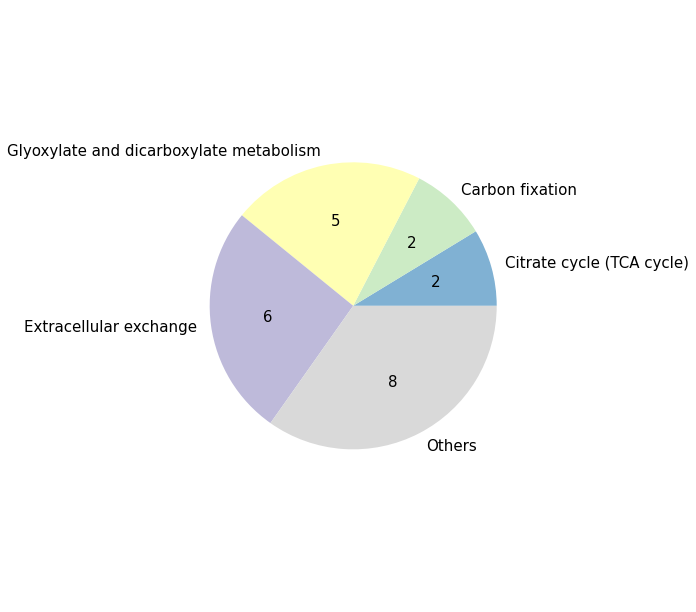

In [13]:
import matplotlib as mpl

piechart_subs = {}
for r in final_pvals:
    if stat_results[r][2] == 0:
        print(r)
        s = model.reactions.get_by_id(r).subsystem
        if s not in piechart_subs.keys():
            piechart_subs[s] = [r]
        else:
            piechart_subs[s].append(r)
        
piechart = {}
for s in piechart_subs.keys():
    if len(piechart_subs[s])>1: 
        piechart[s] = len(piechart_subs[s])
    else:
        if 'Others' not in piechart.keys():
            piechart['Others'] = 1
        else:
            piechart['Others'] += 1
            
piechart_final = {}
for s in piechart.keys():
    if piechart[s] > 1: 
        piechart_final[s] = piechart[s]

piechart = sorted(piechart_final.items(), key=lambda x:x[1])
piechart = dict(piechart)
plt.rcParams['figure.figsize'] = [11, 11]
        
cmap = plt.get_cmap('Set3')
custom_palette = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
import random as rd
rd.shuffle(custom_palette)

plt.pie(piechart.values(), labels=piechart.keys(), 
        colors=custom_palette,
        autopct=lambda x: '{:.0f}'.format(x*pd.Series(piechart.values()).sum()/100),
       labeldistance=1.1, radius=0.6, textprops={'fontsize': 15})

    

EX_co2_e
EX_hco3_e
NAt3pp
H2CO3_NAt_syn
HCO3E
TPI
EX_h_e
PRUK
RBPC
RPI
PGK
BCT1_syn
TKT1
GAPDi_nadp
RPE
TKT2
ENO
PGM
POR_syn
PDHcr
PDHbr
PDHa
EX_h2o_e
PSII
FBP
FBA
PDH
EX_o2_e
EX_photon_e
ATPSu
ACKr
PTAr
GLYOX
MGSA
LGTHL
LDH_D
O2tu
H2Otu_syn
SBP
FBA3
PPC
FNOR
CBFC2


([<matplotlib.patches.Wedge at 0x7f5b21ea4f40>,
 [Text(0.6306780507346862, 0.19453841862597895, 'Photosynthesis'),
  Text(0.4115032605995804, 0.516008785308849, 'Carbon fixation'),
  Text(0.0493218434274947, 0.6581545075139376, 'Pentose phosphate pathway'),
  Text(-0.3717912571642028, 0.5453175782021533, 'Transport'),
  Text(-0.6526283507906476, 0.09836785930515854, 'Extracellular exchange'),
  Text(-0.3717911933438045, -0.5453176217141619, 'Pyruvate metabolism'),
  Text(0.48381427643732317, -0.44891396270936984, 'Glycolysis/Gluconeogenesis')],
 [Text(0.344006209491647, 0.10611186470507943, '4'),
  Text(0.22445632396340748, 0.28145933744119034, '4'),
  Text(0.026902823687724384, 0.358993367734875, '4'),
  Text(-0.20279523118047424, 0.2974459517466291, '5'),
  Text(-0.3559791004312623, 0.05365519598463193, '6'),
  Text(-0.2027951963693479, -0.29744597548045193, '9'),
  Text(0.2638986962385399, -0.24486216147783807, '10')])

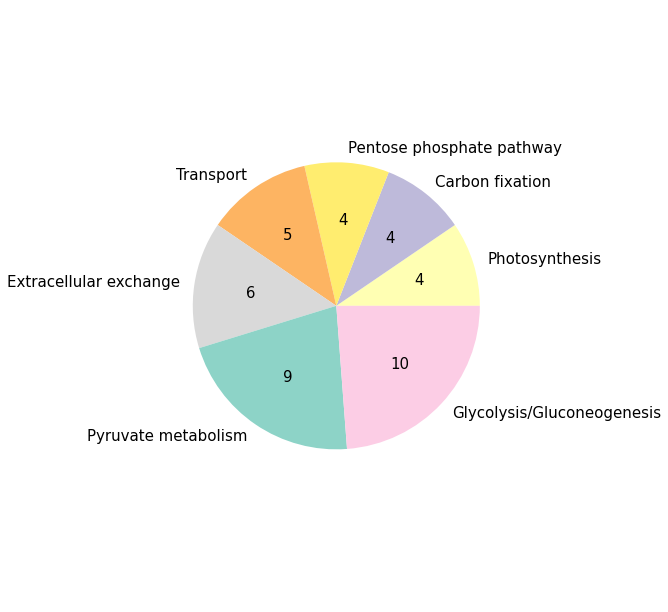

In [19]:
piechart_subs = {}
for r in final_pvals:
    if stat_results[r][2] == 1:
        print(r)
        s = model.reactions.get_by_id(r).subsystem
        if s not in piechart_subs.keys():
            piechart_subs[s] = [r]
        else:
            piechart_subs[s].append(r)
        
piechart = {}
for s in piechart_subs.keys():
    if len(piechart_subs[s])>1: 
        piechart[s] = len(piechart_subs[s])
    else:
        if 'Others' not in piechart.keys():
            piechart['Others'] = 1
        else:
            piechart['Others'] += 1
            
piechart_final = {}
for s in piechart.keys():
    if piechart[s] > 2: 
        piechart_final[s] = piechart[s]

piechart = sorted(piechart_final.items(), key=lambda x:x[1])
piechart = dict(piechart)
plt.rcParams['figure.figsize'] = [11, 11]
    
cmap = plt.get_cmap('Set3')
custom_palette = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
import random as rd
rd.shuffle(custom_palette)

plt.pie(piechart.values(), labels=piechart.keys(), 
        colors=custom_palette,
        autopct=lambda x: '{:.0f}'.format(x*pd.Series(piechart.values()).sum()/100),
       labeldistance=1.1, radius=0.6, textprops={'fontsize': 15})

    

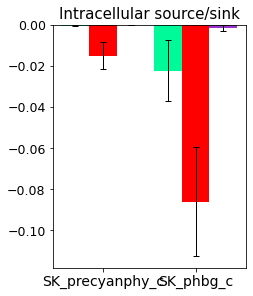

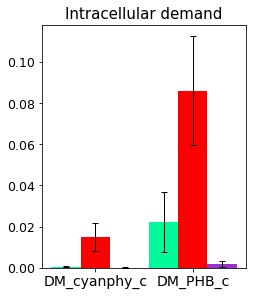

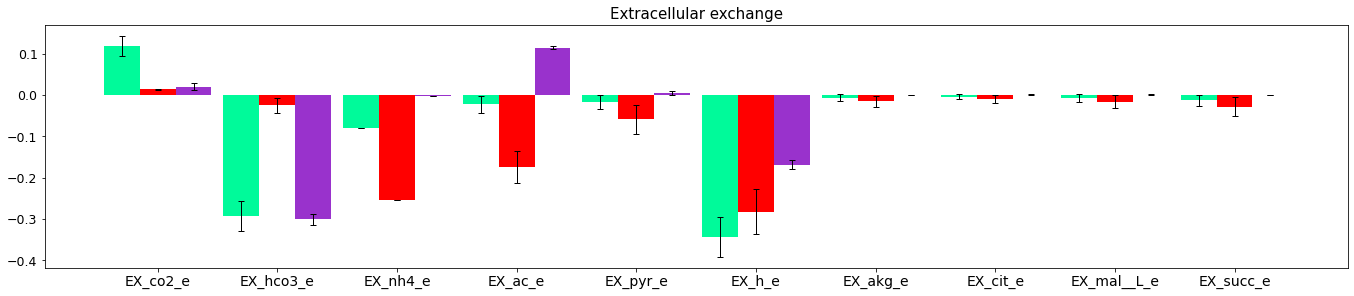

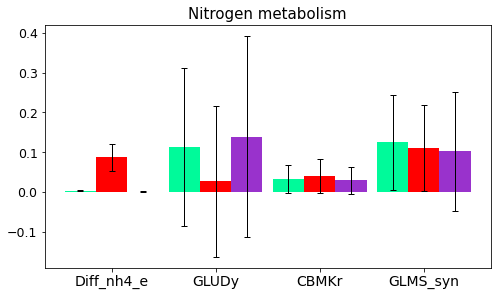

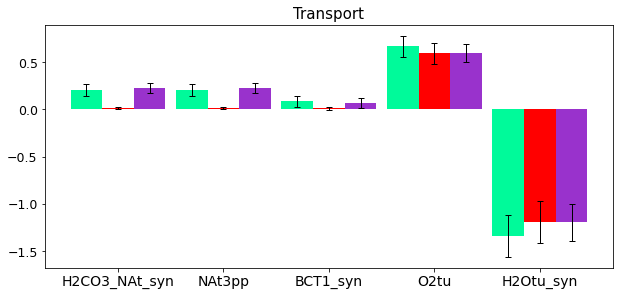

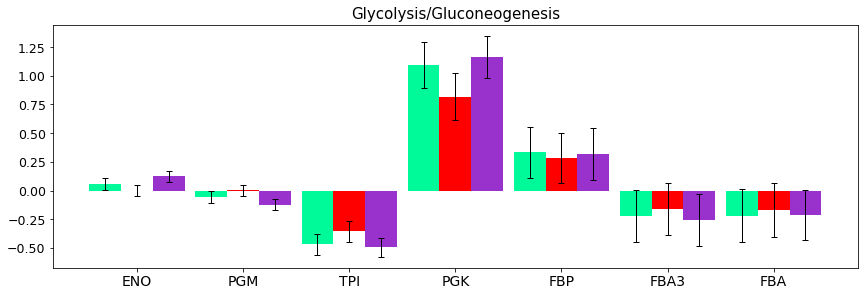

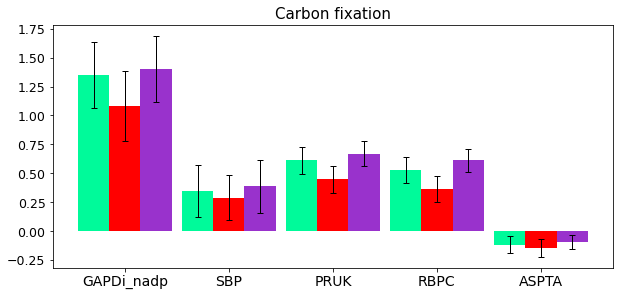

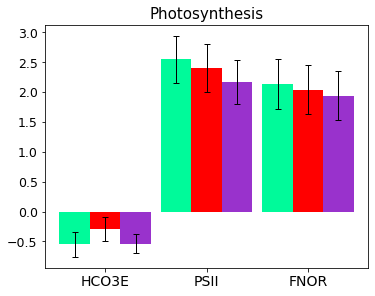

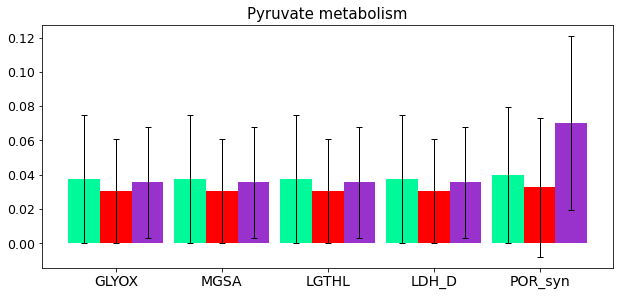

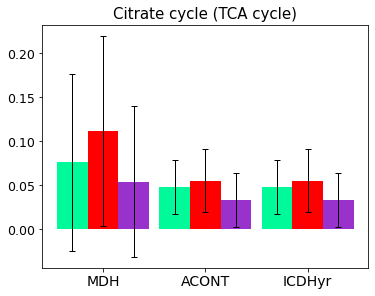

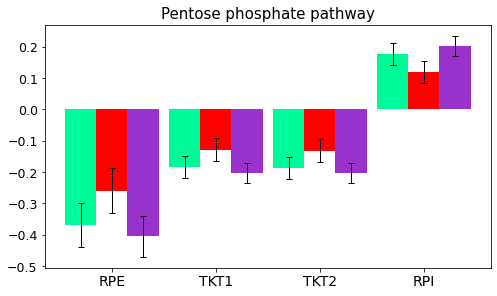

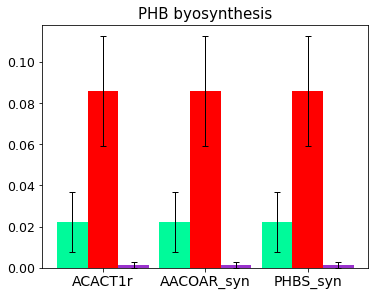

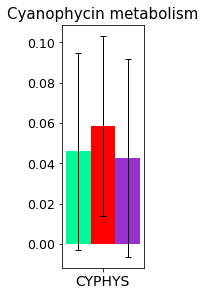

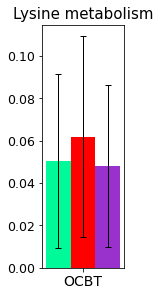

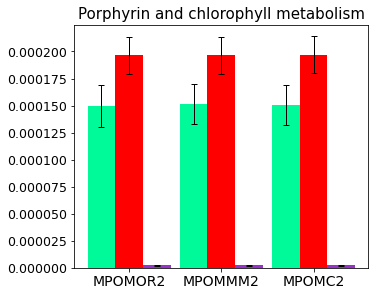

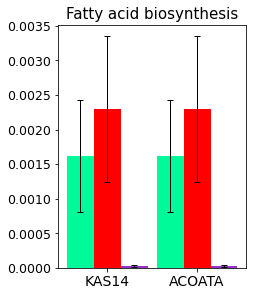

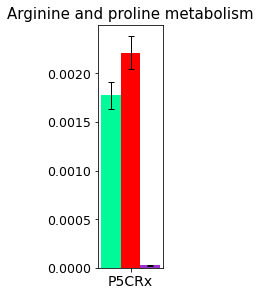

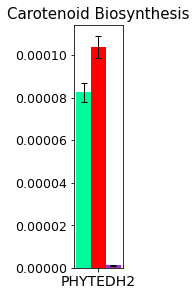

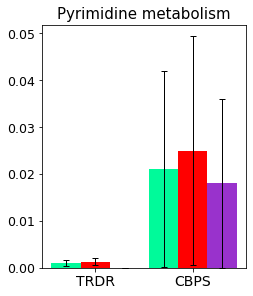

In [11]:


subsystems = {}
for r in pvals:
    s = model.reactions.get_by_id(r).subsystem
    if s not in subsystems.keys():
        subsystems[s] = [r]
    else:
        subsystems[s].append(r)


for s in subsystems:
    
    barplot = {}
    errors = {}
    clusters = ['C turnover', 'N turnover', 'Slow growth']
    for df,sd, cluster in zip([df2, df1, df3],[sd2,sd1,sd3], clusters):
        barplot[cluster] = [np.mean(df[r]) for r in subsystems[s] if r!='EX_photon_e']
        errors[cluster] = [np.mean(sd[r]) for r in subsystems[s] if r!='EX_photon_e']
    
    reactions = [r for r in subsystems[s] if r != 'EX_photon_e']
    
    plt.rcParams['figure.figsize'] = [len(subsystems[s])*1.7, 4]

    x = np.arange(len(reactions))  # the label locations
    width = 0.3  # the width of the bars
    multiplier = 0
    
    colors = [ 'mediumspringgreen', 'red','darkorchid']

    fig, ax = plt.subplots(layout='constrained')
    
    i = 0
    for attribute, measurement in barplot.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, 
                       color= colors[i], yerr= errors[attribute], 
                       error_kw={'linewidth':1, 'capsize':3})
        #ax.bar_label(rects, padding=3)
        multiplier += 1
        i += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    #ax.set_ylabel('Flux')
    ax.set_title(s, fontsize=15)
    ax.tick_params(labelsize=12.5)
    ax.set_xticks(x + width, reactions, fontsize=14)
    #ax.legend(loc='best', fontsize=15)
    #ax.set_ylim(0, 250)
    
    plt.show()
        


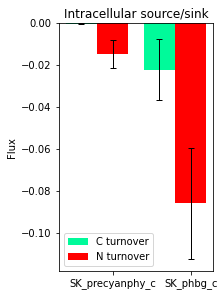

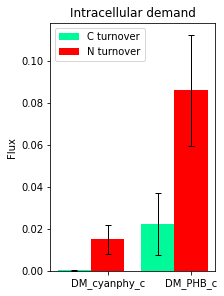

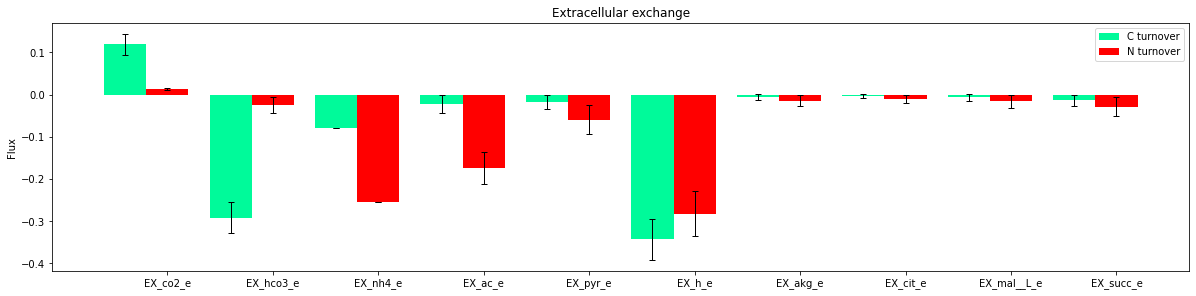

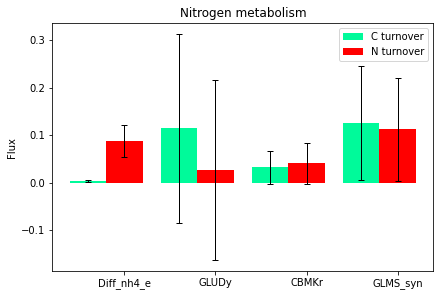

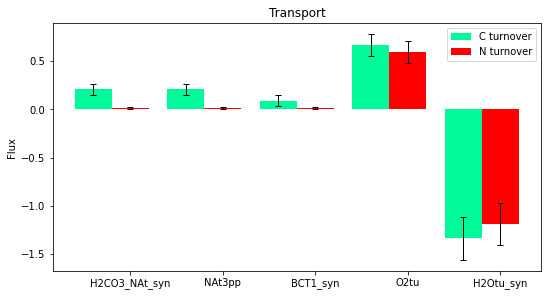

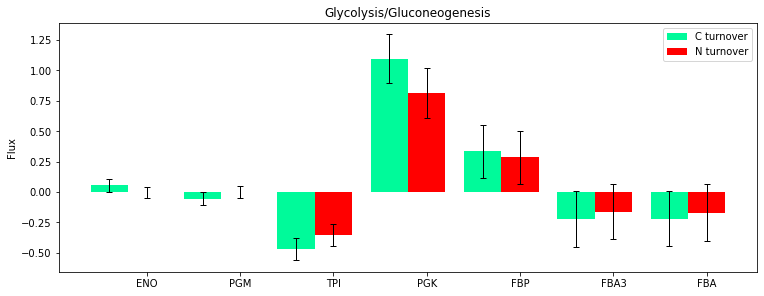

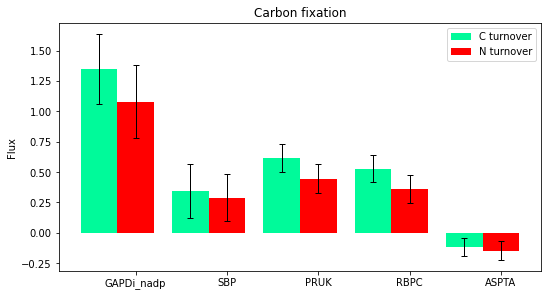

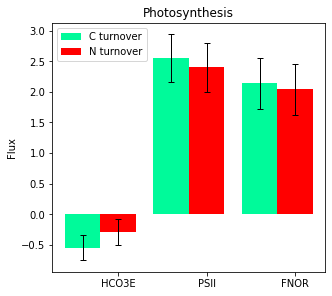

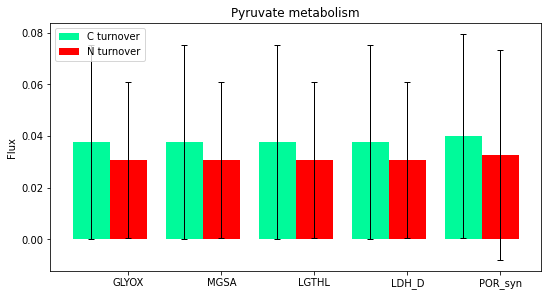

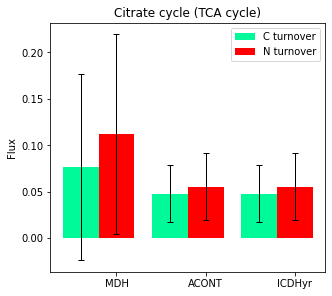

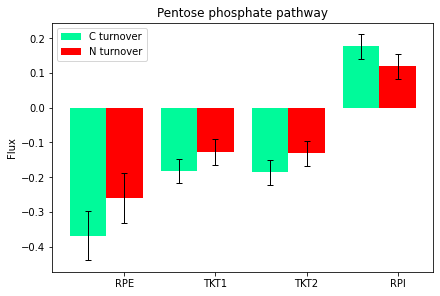

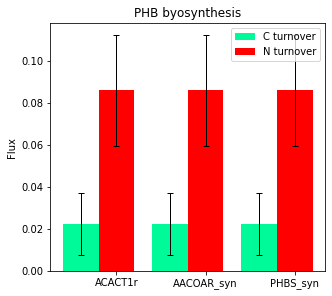

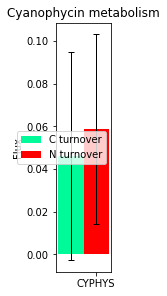

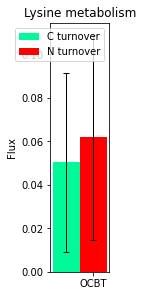

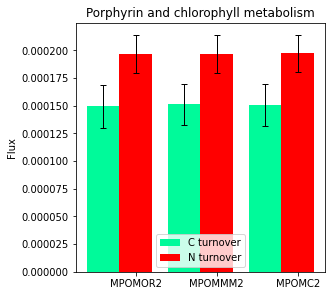

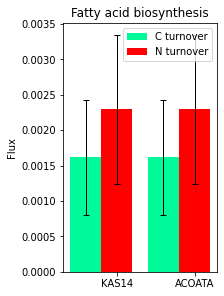

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


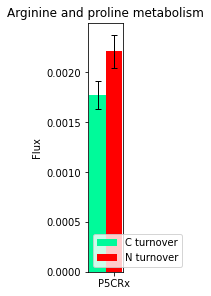

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


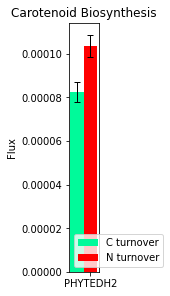

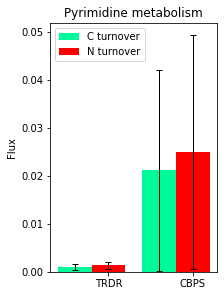

In [150]:


subsystems = {}
for r in pvals:
    s = model.reactions.get_by_id(r).subsystem
    if s not in subsystems.keys():
        subsystems[s] = [r]
    else:
        subsystems[s].append(r)


for s in subsystems:
    
    barplot = {}
    errors = {}
    clusters = ['C turnover', 'N turnover']
    for df,sd, cluster in zip([df2, df1],[sd2,sd1], clusters):
        barplot[cluster] = [np.mean(df[r]) for r in subsystems[s] if r!='EX_photon_e']
        errors[cluster] = [np.mean(sd[r]) for r in subsystems[s] if r!='EX_photon_e']
    
    reactions = [r for r in subsystems[s] if r != 'EX_photon_e']
    
    plt.rcParams['figure.figsize'] = [len(subsystems[s])*1.5, 4]

    x = np.arange(len(reactions))  # the label locations
    width = 0.4  # the width of the bars
    multiplier = 0
    
    colors = [ 'mediumspringgreen', 'red','darkorchid']

    fig, ax = plt.subplots(layout='constrained')
    
    i = 0
    for attribute, measurement in barplot.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, 
                       color= colors[i], yerr= errors[attribute], 
                       error_kw={'linewidth':1, 'capsize':3})
        #ax.bar_label(rects, padding=3)
        multiplier += 1
        i += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Flux')
    ax.set_title(s)
    ax.set_xticks(x + width, reactions)
    ax.legend(loc='best')
    #ax.set_ylim(0, 250)
    
    plt.show()
        


Intracellular source/sink


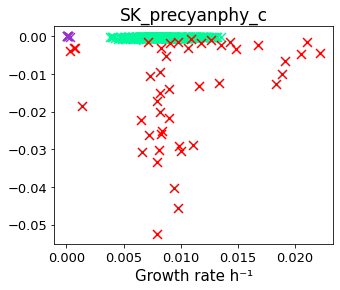

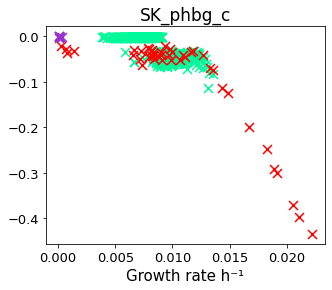

Intracellular demand


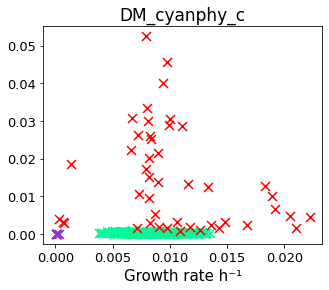

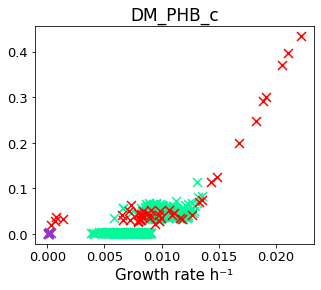

Extracellular exchange


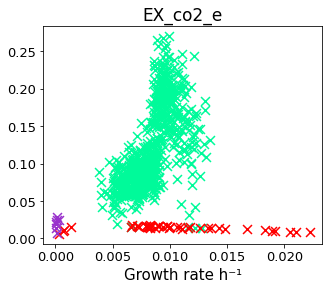

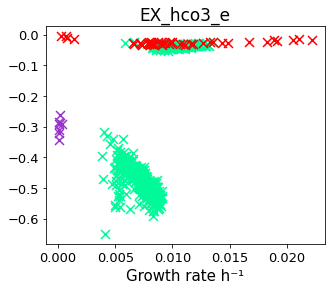

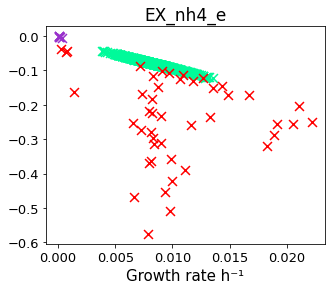

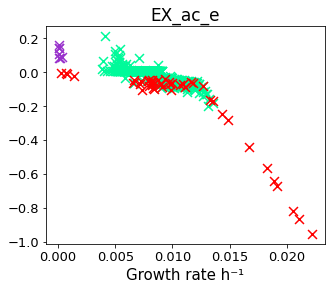

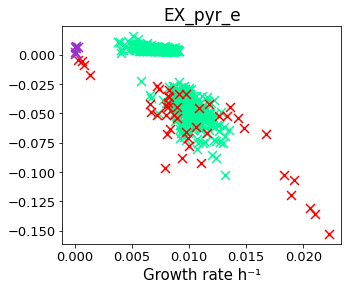

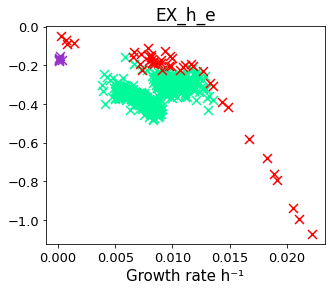

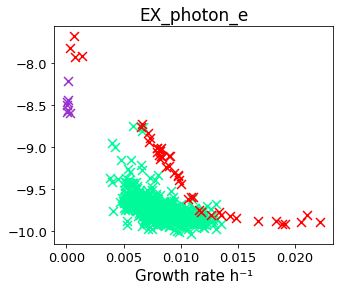

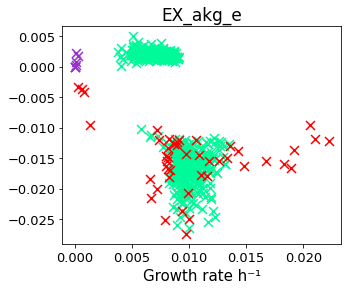

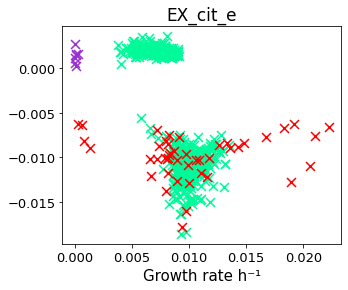

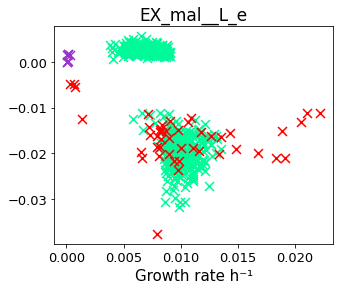

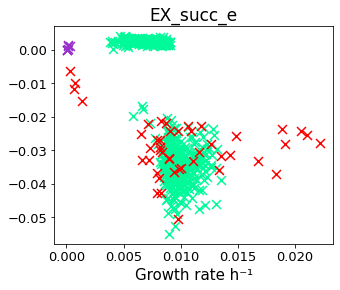

Nitrogen metabolism


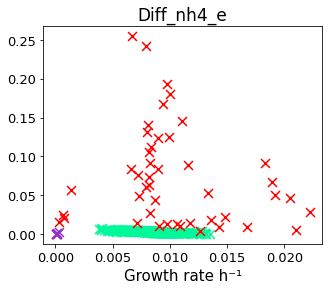

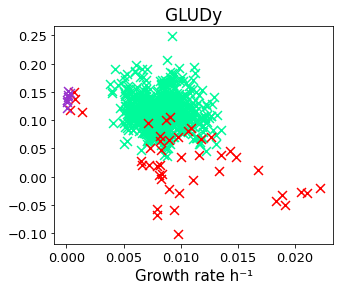

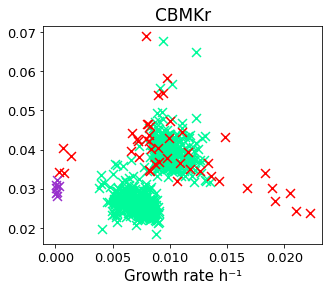

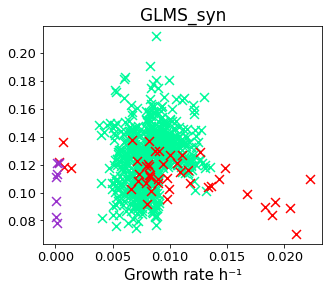

Transport


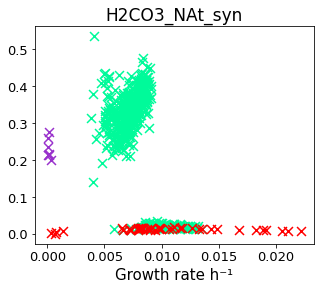

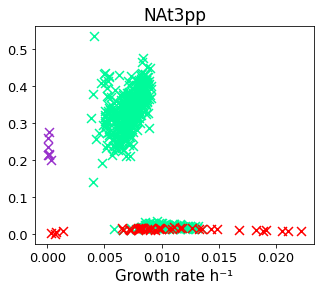

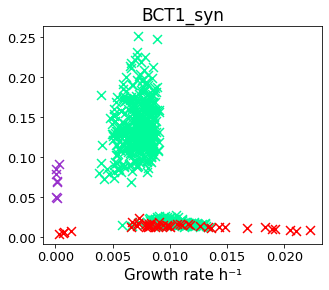

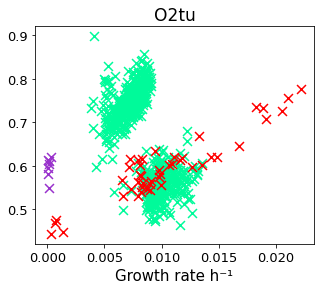

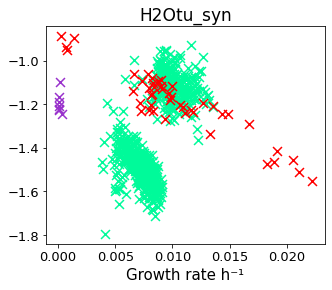

Glycolysis/Gluconeogenesis


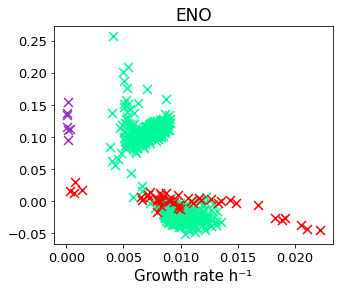

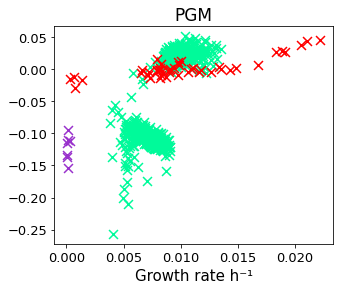

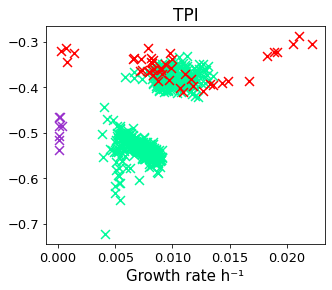

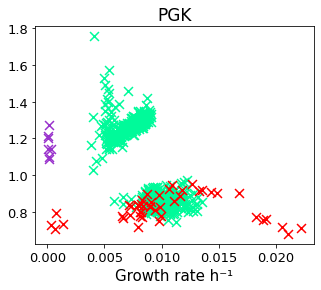

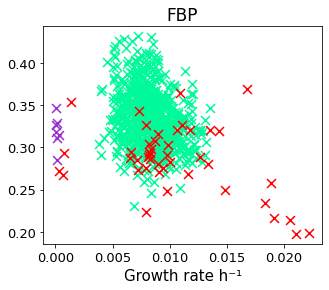

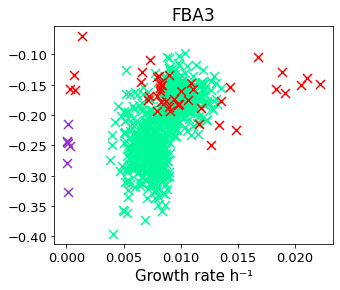

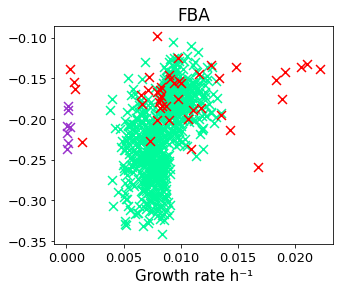

Carbon fixation


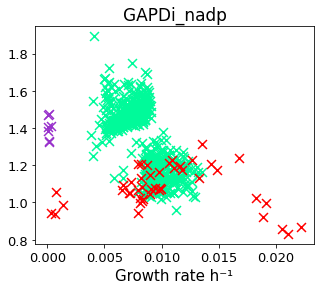

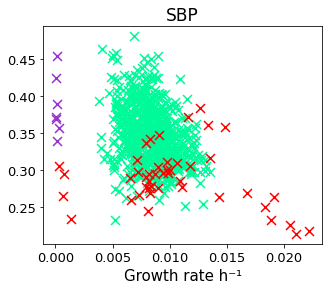

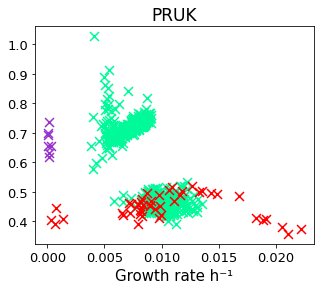

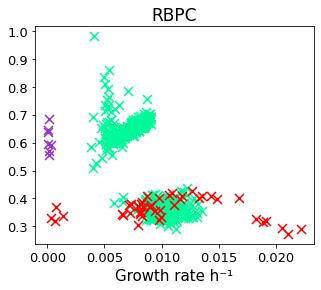

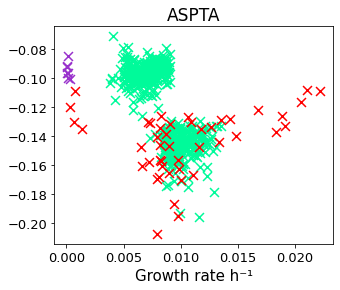

Photosynthesis


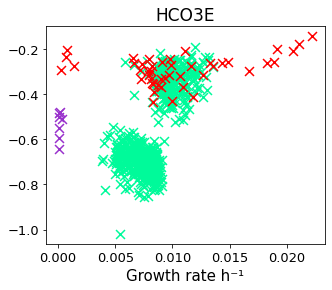

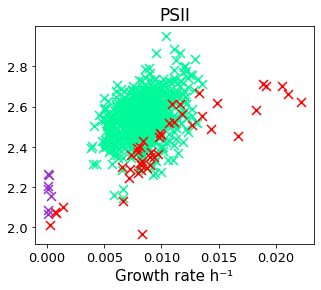

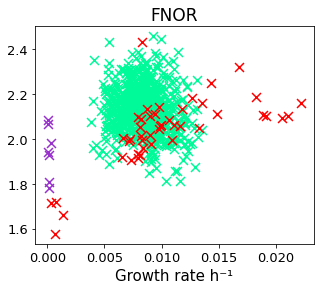

Pyruvate metabolism


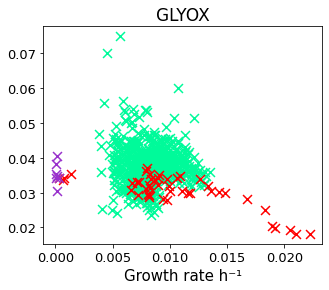

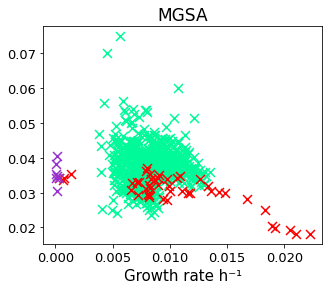

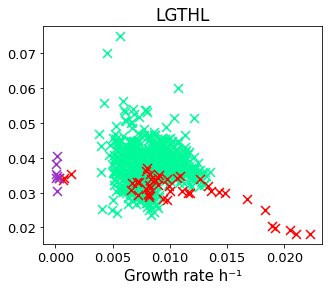

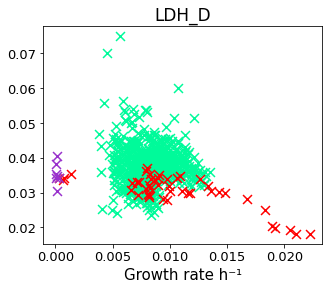

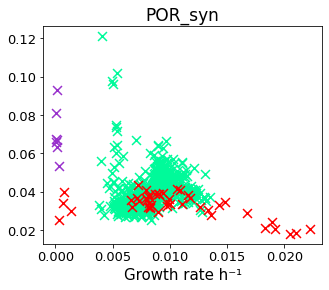

Citrate cycle (TCA cycle)


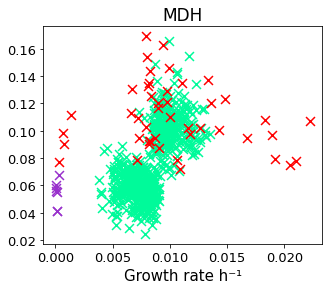

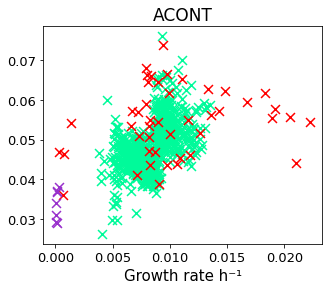

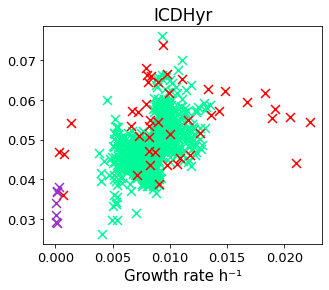

Pentose phosphate pathway


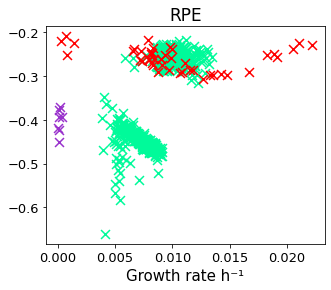

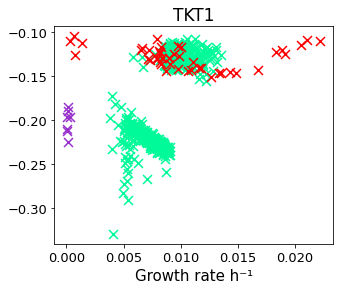

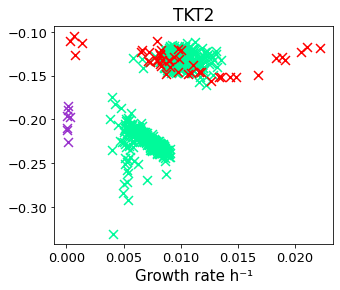

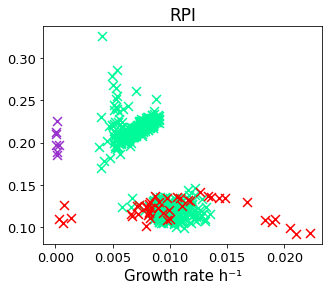

PHB byosynthesis


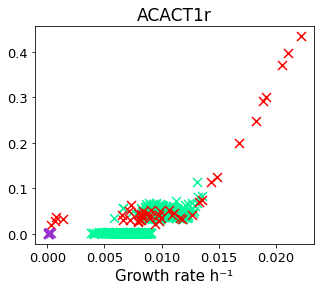

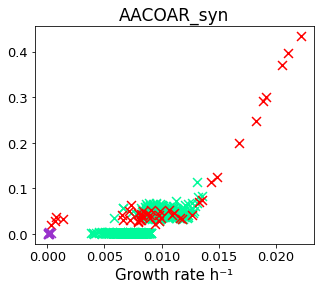

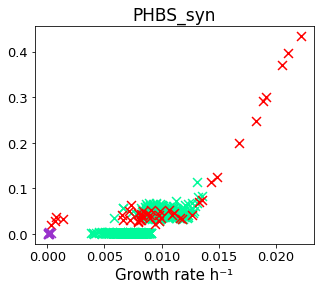

Cyanophycin metabolism


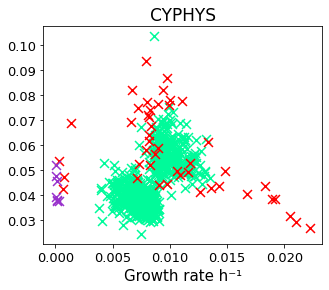

Lysine metabolism


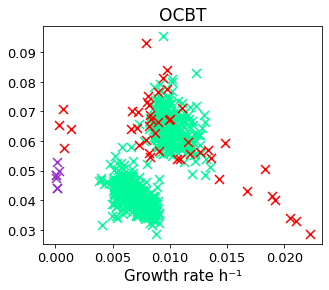

Porphyrin and chlorophyll metabolism


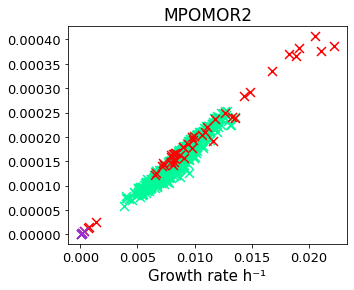

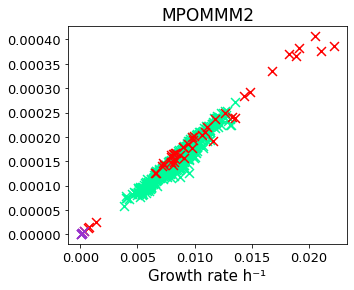

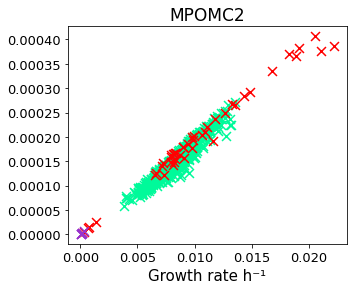

Fatty acid biosynthesis


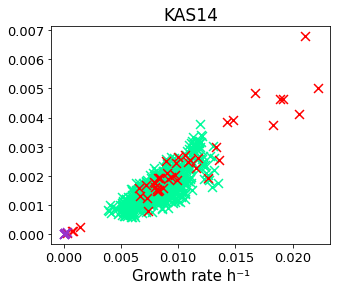

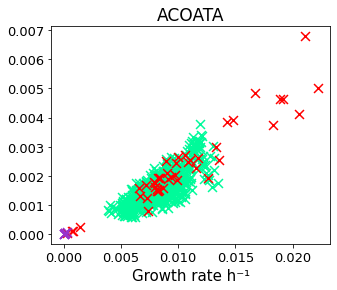

Arginine and proline metabolism


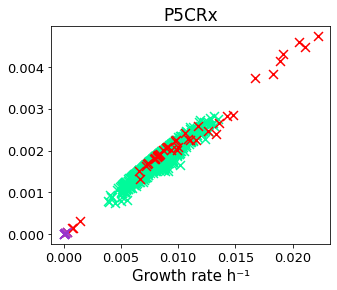

Carotenoid Biosynthesis


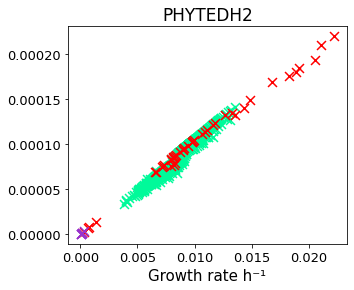

Pyrimidine metabolism


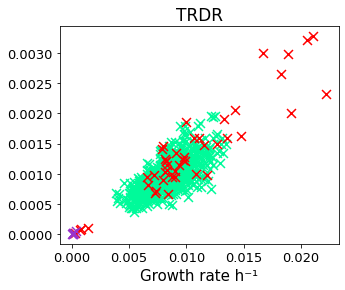

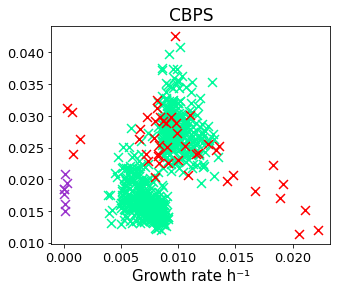

In [20]:
plt.rcParams['figure.figsize'] = [5,4]


for s in subsystems:
    print(s)
    for r in subsystems[s]:
        plt.scatter(final_mean_dfs[1]['BIOMASS_Ec_SynMixo'],
                    final_mean_dfs[1][r], s=80, color='mediumspringgreen', marker='x')
        plt.scatter(final_mean_dfs[0]['BIOMASS_Ec_SynMixo'], 
                    final_mean_dfs[0][r], marker='x',s=80, color='red')
        plt.scatter(final_mean_dfs[2]['BIOMASS_Ec_SynMixo'],
                    final_mean_dfs[2][r], marker='x',s=80, color='darkorchid')
        plt.title(r, y=1, loc='center', fontsize=17)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel('Growth rate h⁻¹', fontsize=15)
        plt.show()

In [33]:
model.reactions.MDH

Reaction identifier,MDH
Name,Malate dehydrogenase
Memory address,0x07f7611571760
Stoichiometry,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c L-Malate + Nicotinamide adenine dinucleotide <=> H+ + Nicotinamide adenine dinucleotide - reduced + Oxaloacetate
GPR,citH
Lower bound,-1000.0
Upper bound,1000.0


Extracellular exchange 19


/home/arianferrero/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Reaction,Cluster,Value
0,EX_ac_e,1,-2.522467
1,EX_ac_e,1,-1.79339
2,EX_ac_e,1,-1.391682
3,EX_ac_e,1,-2.797125
4,EX_ac_e,1,-2.439746
...,...,...,...
13922,EX_mg2_e,3,-11.572691
13923,EX_mg2_e,3,-12.614071
13924,EX_mg2_e,3,-13.403025
13925,EX_mg2_e,3,-12.619592


/home/arianferrero/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

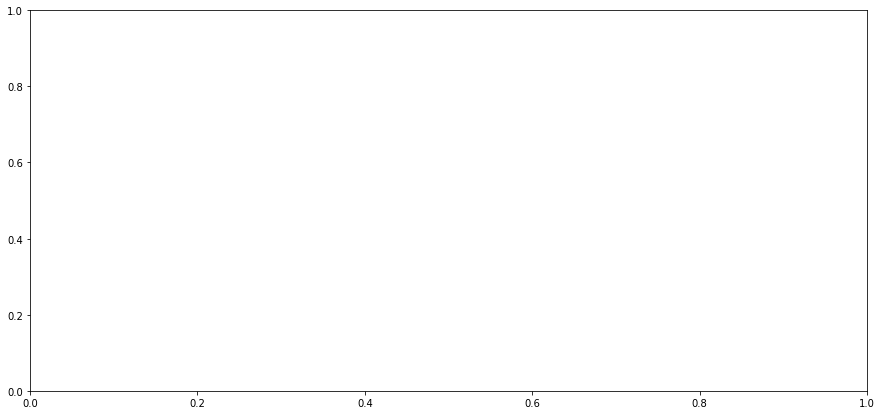

In [153]:
plt.rcParams['figure.figsize'] = [15,7]

n_cells = len(final_mean_dfs[0]) + len(final_mean_dfs[1]) + len(final_mean_dfs[2])

subs = {}
for r in stat_results:
    s = model.reactions.get_by_id(r).subsystem
    if s not in subs.keys():
        subs[s] = [r]
    else:
        subs[s].append(r)

for s in subs:
    print(s, len(subs[s]))
    columns = ['Reaction', 'Cluster', 'Value']
    clusters = [1 for i in range(0,len(final_mean_dfs[0]))] + [2 for i in range(0,len(final_mean_dfs[1]))] + [3 for i in range(0,len(final_mean_dfs[2]))]
    clusters = clusters*len(subs[s])
    reactions = []
    values = []
    for r in subs[s]:
        reactions = reactions + [r]*n_cells
        values = values + list(np.log(abs(final_mean_dfs[0][r]))) + list(np.log(abs(final_mean_dfs[1][r]))) + list(np.log(abs(final_mean_dfs[2][r])))
        
    a = pd.DataFrame([reactions, clusters, values], index=columns ).transpose()  
    display(a)
    a['Value'] = a['Value'].astype(float)
    
    fig, ax = plt.subplots()
    sns.violinplot(ax = ax,
               data = a,
               x = 'Reaction',
               y = 'Value',
               hue = 'Cluster',
               split = False, linewidth=1, width = 1)
    plt.show()
    


Extracellular exchange 13


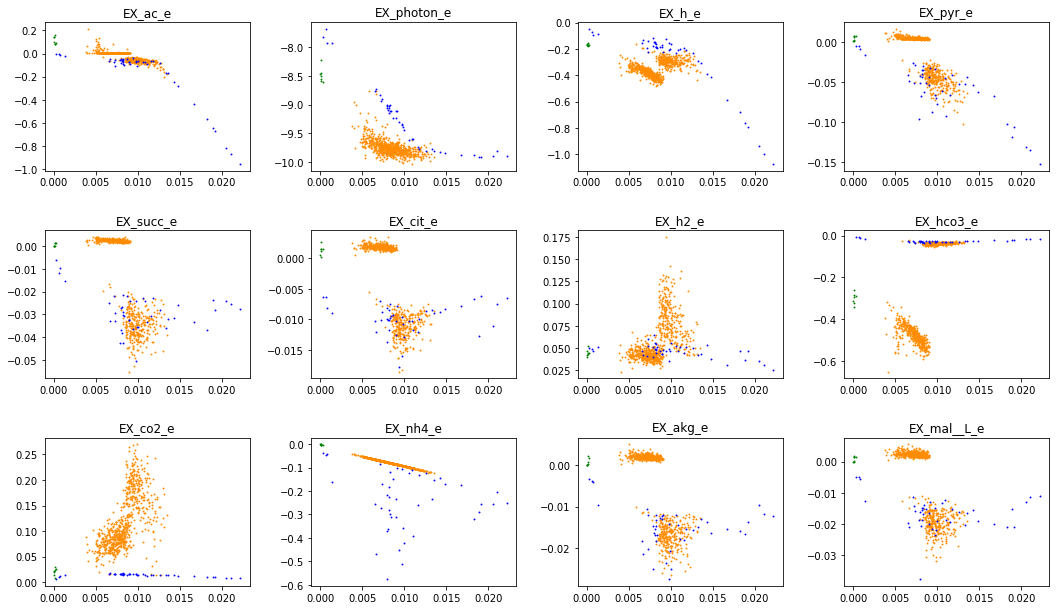

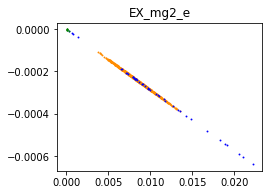

Pyrimidine metabolism 4


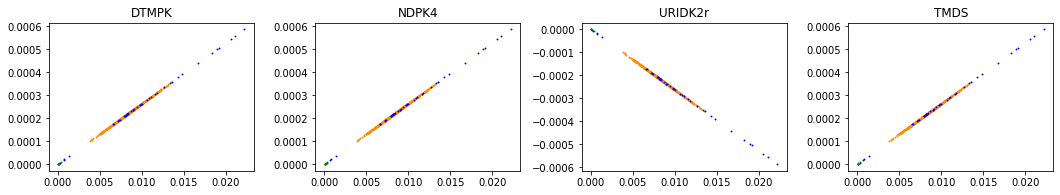

Arginine and proline metabolism 2


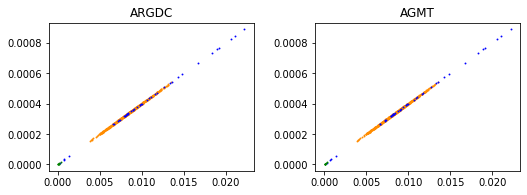

PHB byosynthesis 3


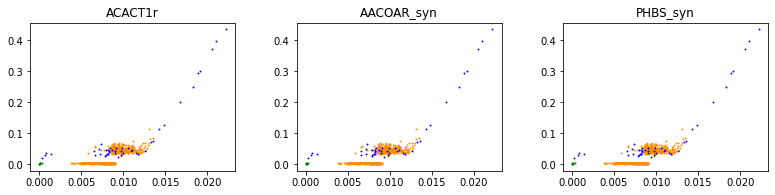

Pyruvate metabolism 8


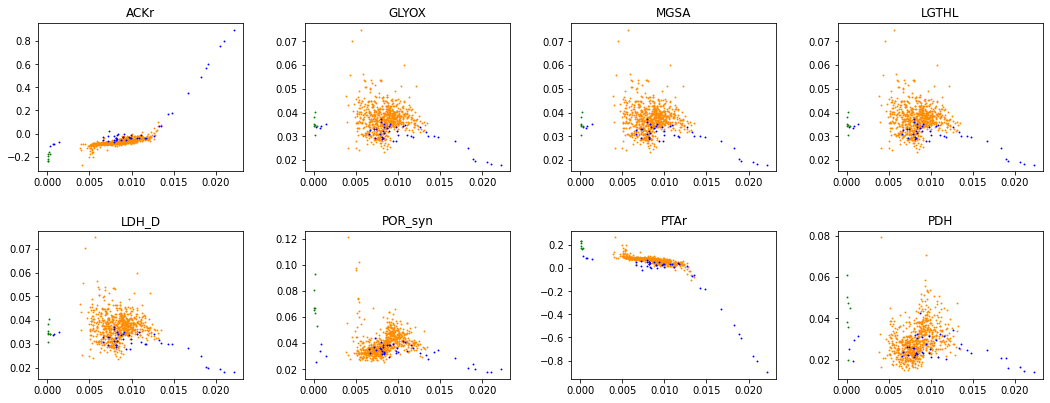

Photosynthesis 5


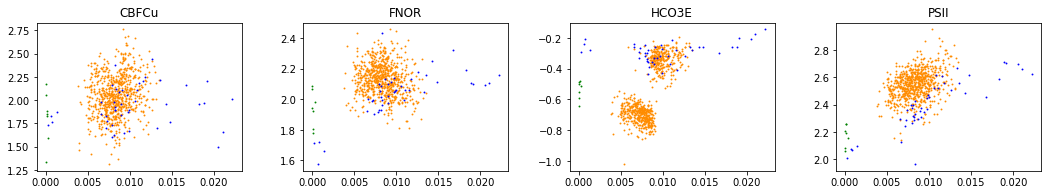

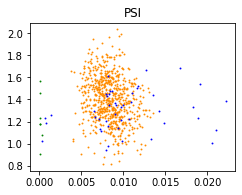

Glycolysis/Gluconeogenesis 8


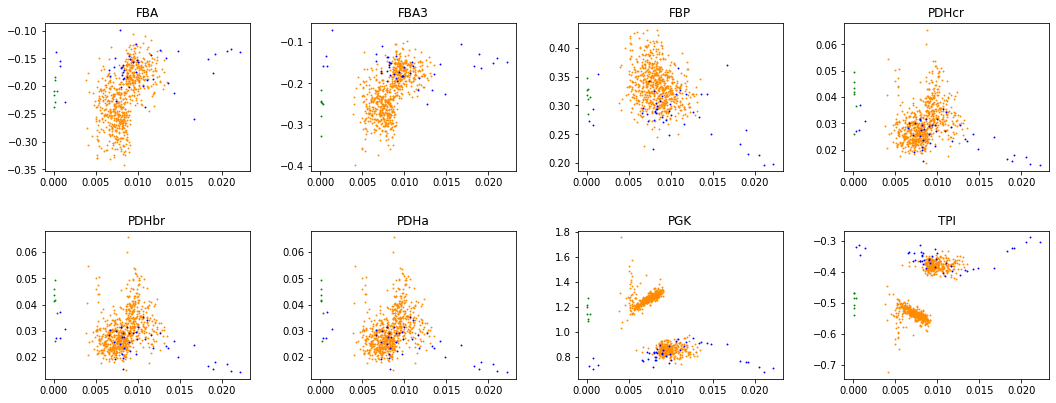

Nitrogen metabolism 3


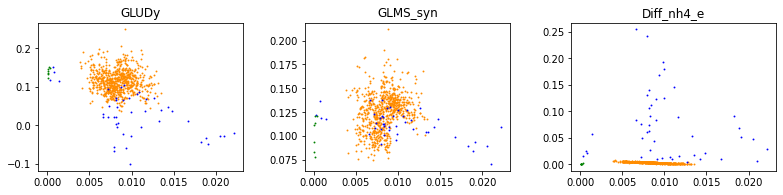

Hydrogen production 1


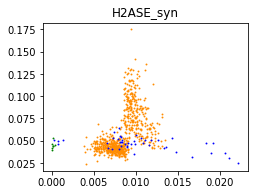

Carbon fixation 4


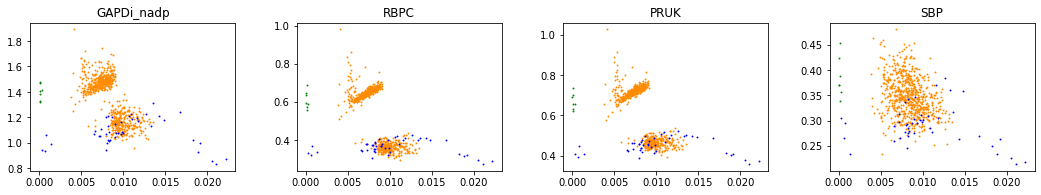

Galactolipids metabolism 3


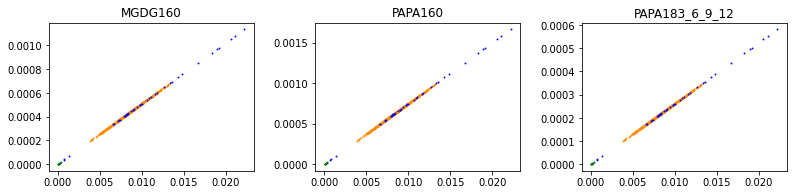

Lipopolysaccharide biosynthesis 4


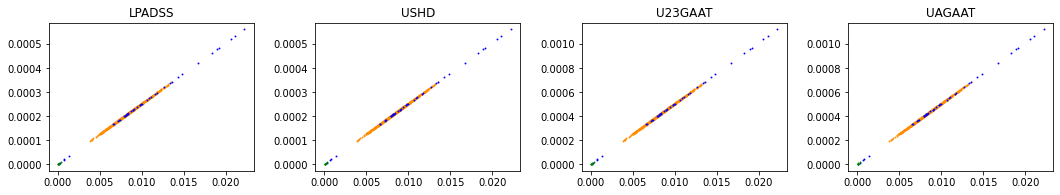

Citrate cycle (TCA cycle) 1


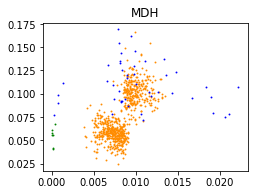

Purine metabolism 2


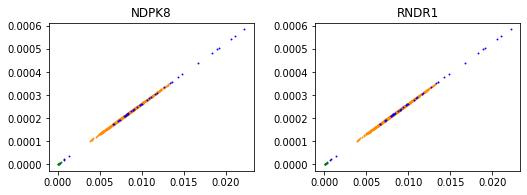

Porphyrin and chlorophyll metabolism 4


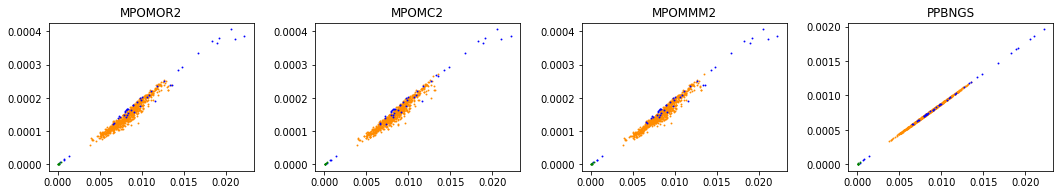

Peptidoglycan biosynthesis 2


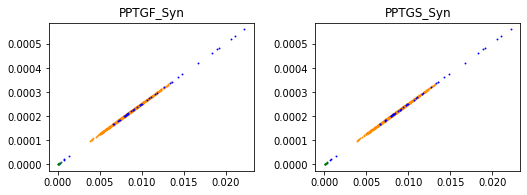

Pentose phosphate pathway 4


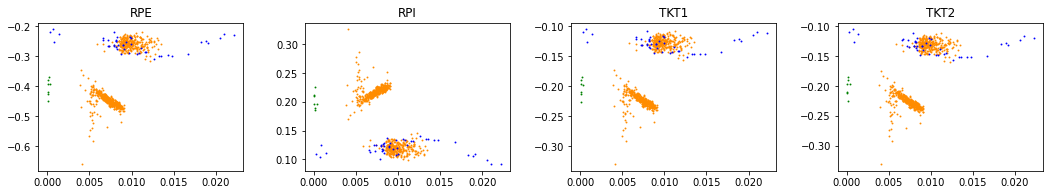

Transport 6


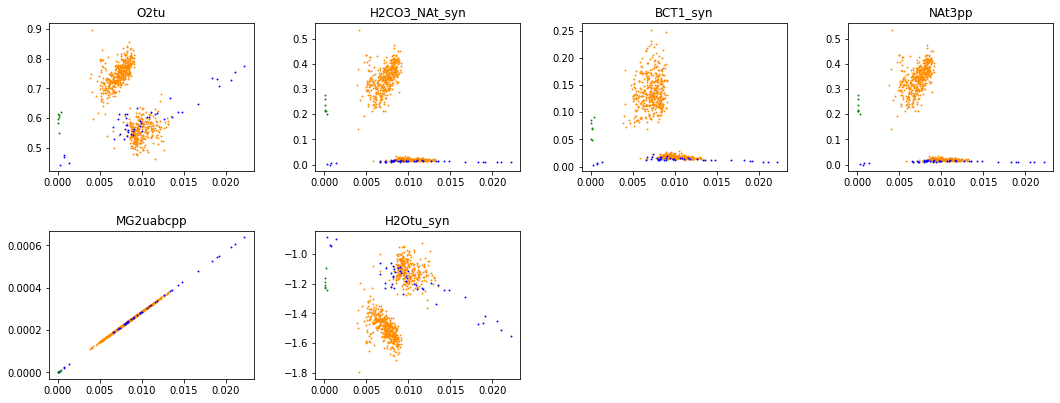

Carotenoid Biosynthesis 1


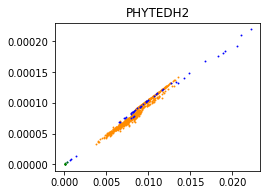

Intracellular source/sink 2


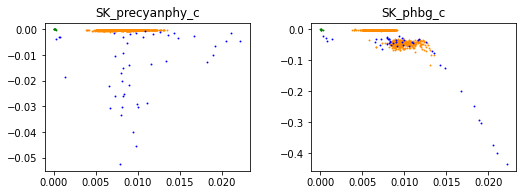

Intracellular demand 2


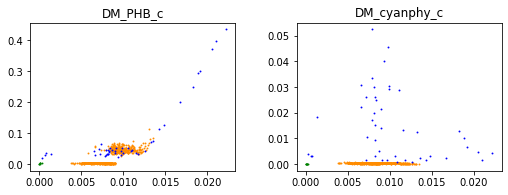

Oxidative phosphorylation 1


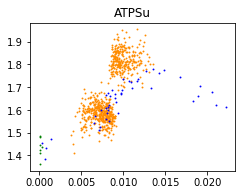

In [11]:
plt.rcParams['figure.figsize'] = [18,18]

subs = {}
for r in stat_results:
    s = model.reactions.get_by_id(r).subsystem
    if s not in subs.keys():
        subs[s] = [r]
    else:
        subs[s].append(r)

for s in subs:
    print(s, len(subs[s]))
    n = 0 
    size = int(max(len(subs[s])/4, round(len(subs[s])/4)))
    if size == 0:
        size = 1
 
    while n<len(subs[s]):
        a = 0
        if a < 10: 
            plt.figure(0)
            plt.title(s)
            plots = []
            for i in range(size):
                for j in range(4):
                    if n<len(subs[s]):
                        ax = plt.subplot2grid((5,4), (i,j), )
                        plt.subplots_adjust(hspace=0.4,wspace=0.3)
                        plt.scatter(final_mean_dfs[1]['BIOMASS_Ec_SynMixo'], 
                                    final_mean_dfs[1][subs[s][n]], s=0.8, color='darkorange')
                        plt.scatter(final_mean_dfs[0]['BIOMASS_Ec_SynMixo'], 
                                    final_mean_dfs[0][subs[s][n]], s=0.8, color='blue')
                        plt.scatter(final_mean_dfs[2]['BIOMASS_Ec_SynMixo'], 
                                    final_mean_dfs[2][subs[s][n]], s=0.8, color='green')
                        plt.title(subs[s][n], y=1, loc='center')
                        #plt.xlabel('Growth rate h⁻¹')
                    #plt.yticks(visible=False)

    
                    a+=1
                    n+=1
            plt.show()

In [12]:
model.reactions.EX_ala__L_e

Reaction identifier,EX_ala__L_e
Name,L-Alanine exchange
Memory address,0x07f08e2ee3dc0
Stoichiometry,ala__L_e --> L-Alanine -->
GPR,
Lower bound,0.0
Upper bound,1000.0


Extracellular exchange 13


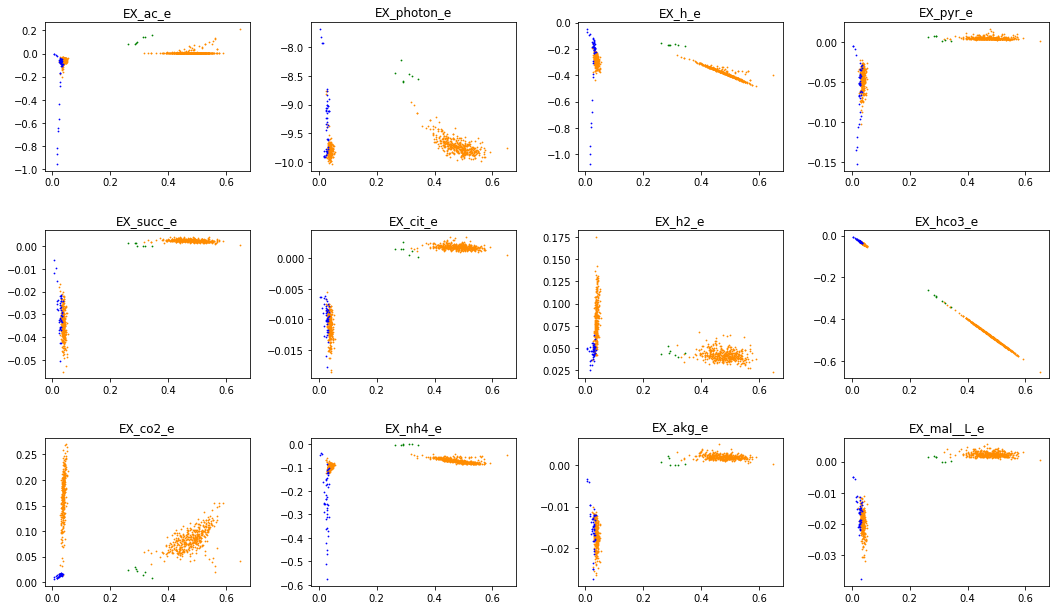

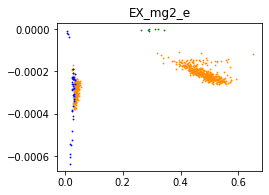

Pyrimidine metabolism 4


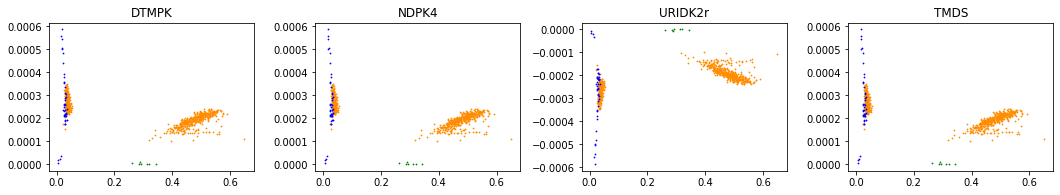

Arginine and proline metabolism 2


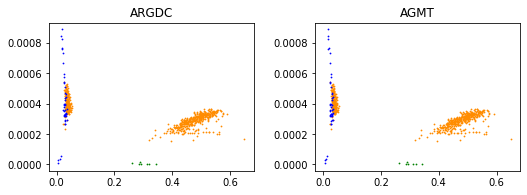

PHB byosynthesis 3


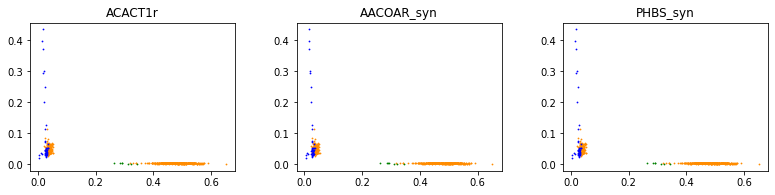

Pyruvate metabolism 8


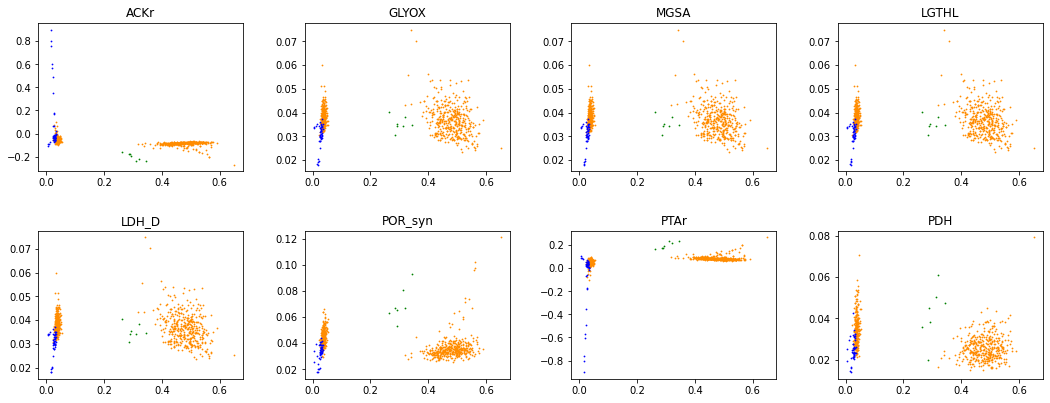

Photosynthesis 5


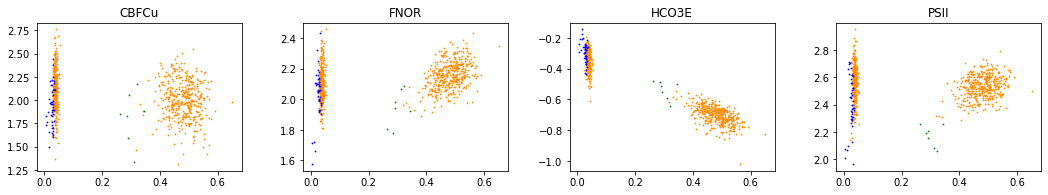

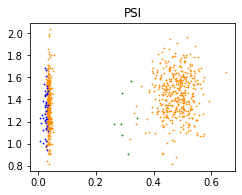

Glycolysis/Gluconeogenesis 8


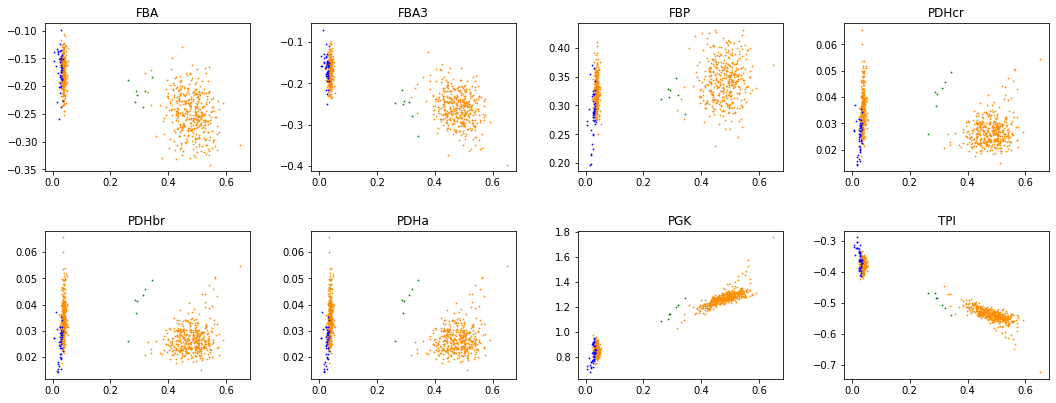

Nitrogen metabolism 3


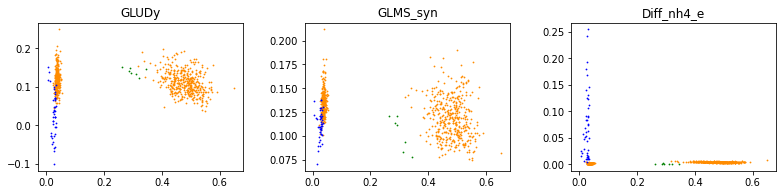

Hydrogen production 1


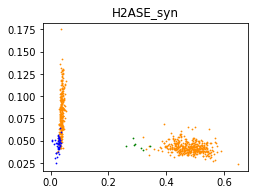

Carbon fixation 4


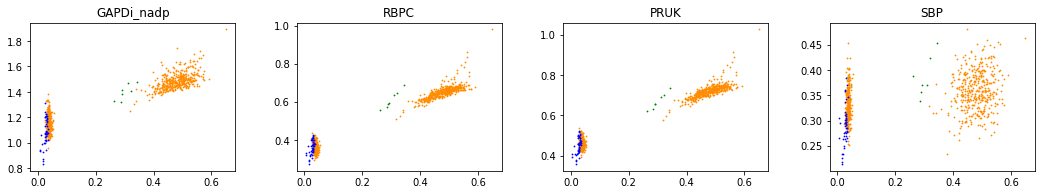

Galactolipids metabolism 3


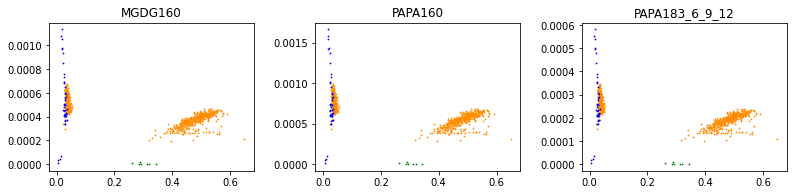

Lipopolysaccharide biosynthesis 4


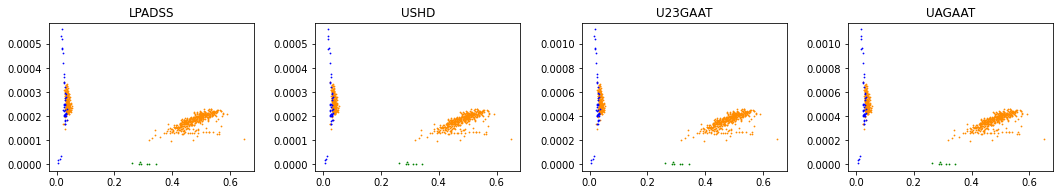

Citrate cycle (TCA cycle) 1


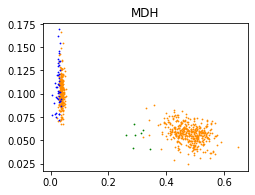

Purine metabolism 2


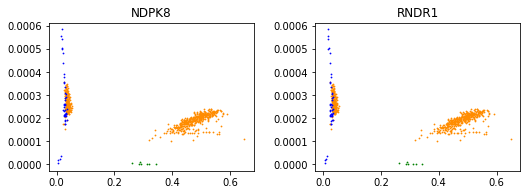

Porphyrin and chlorophyll metabolism 4


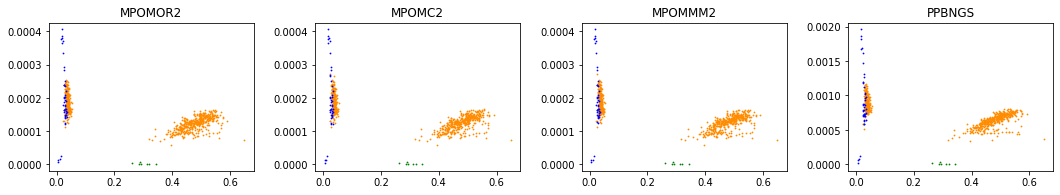

Peptidoglycan biosynthesis 2


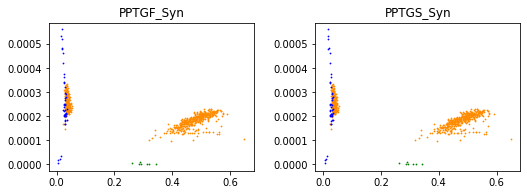

Pentose phosphate pathway 4


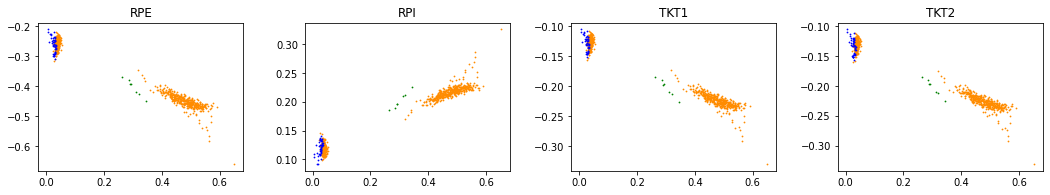

Transport 6


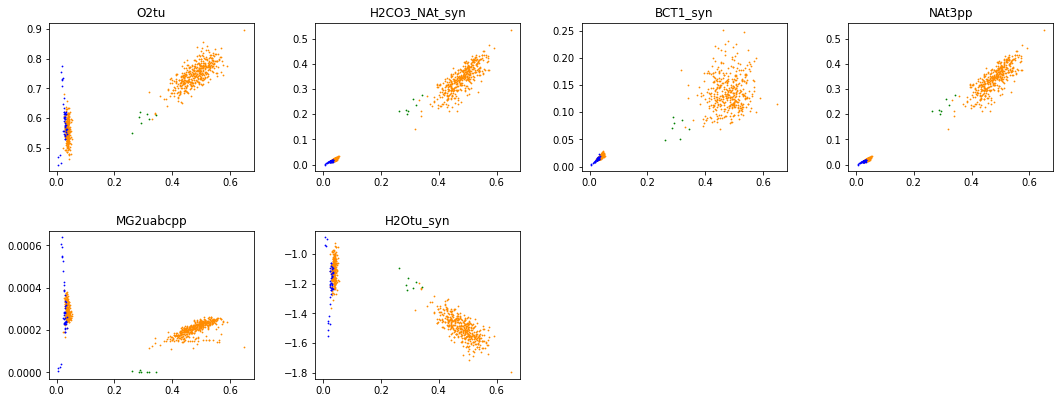

Carotenoid Biosynthesis 1


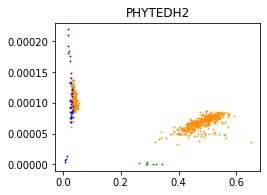

Intracellular source/sink 2


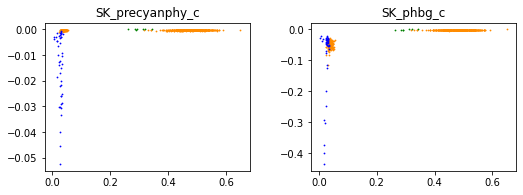

Intracellular demand 2


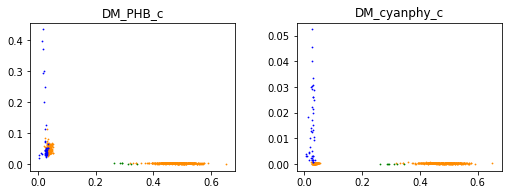

Oxidative phosphorylation 1


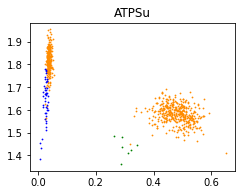

In [30]:
plt.rcParams['figure.figsize'] = [18,18]

subs = {}
for r in stat_results:
    s = model.reactions.get_by_id(r).subsystem
    if s not in subs.keys():
        subs[s] = [r]
    else:
        subs[s].append(r)

for s in subs:
    print(s, len(subs[s]))
    n = 0 
    size = int(max(len(subs[s])/4, round(len(subs[s])/4)))
    if size == 0:
        size = 1
 
    while n<len(subs[s]):
        a = 0
        if a < 10: 
            plt.figure(0)
            plt.title(s)
            plots = []
            for i in range(size):
                for j in range(4):
                    if n<len(subs[s]):
                        ax = plt.subplot2grid((5,4), (i,j), )
                        plt.subplots_adjust(hspace=0.4,wspace=0.3)
                        plt.scatter(abs(final_mean_dfs[1]['EX_hco3_e']), 
                                    final_mean_dfs[1][subs[s][n]], s=0.6, color='darkorange')
                        plt.scatter(abs(final_mean_dfs[0]['EX_hco3_e']), 
                                    final_mean_dfs[0][subs[s][n]], s=0.6, color='blue')
                        plt.scatter(abs(final_mean_dfs[2]['EX_hco3_e']), 
                                    final_mean_dfs[2][subs[s][n]], s=0.6, color='green')
                        plt.title(subs[s][n], y=1, loc='center')
                        #plt.xlabel('Growth rate h⁻¹')
                    #plt.yticks(visible=False)

    
                    a+=1
                    n+=1
            plt.show()

Extracellular exchange 13


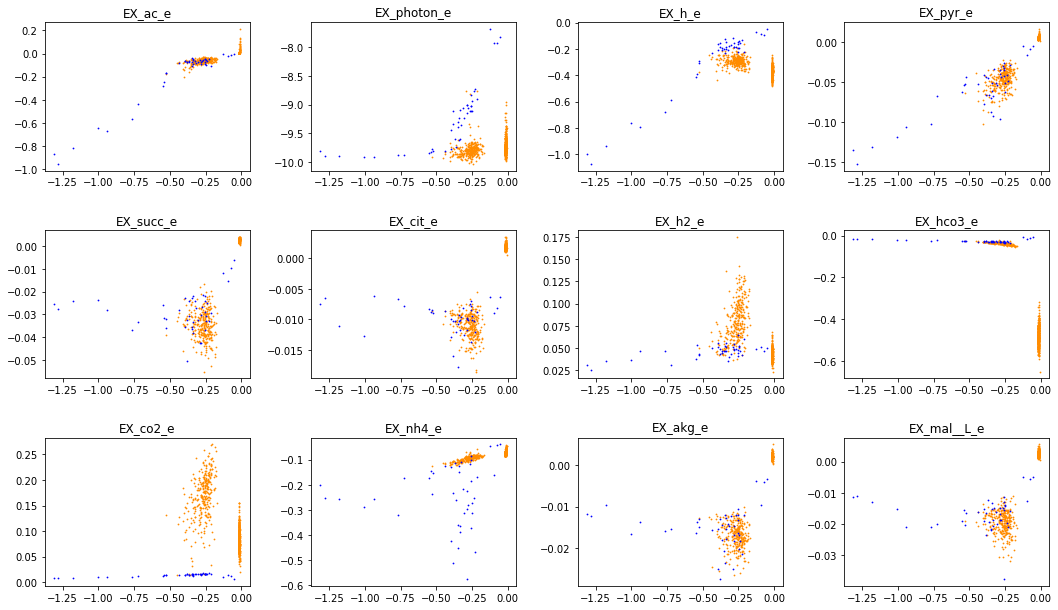

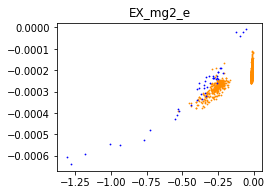

Pyrimidine metabolism 4


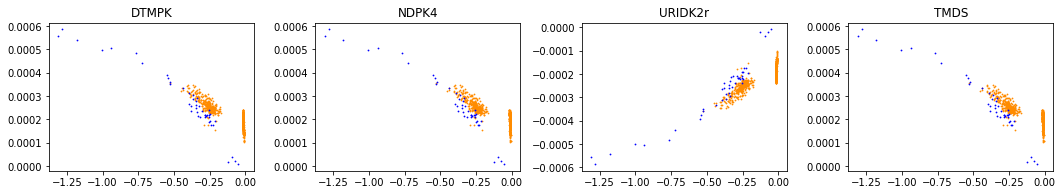

Arginine and proline metabolism 2


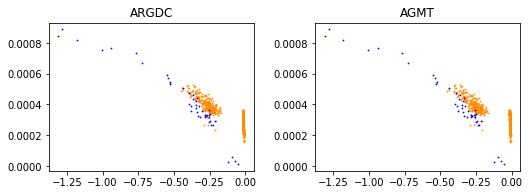

PHB byosynthesis 3


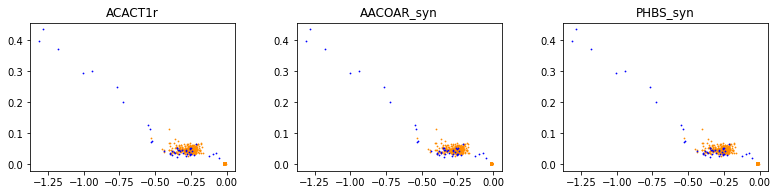

Pyruvate metabolism 8


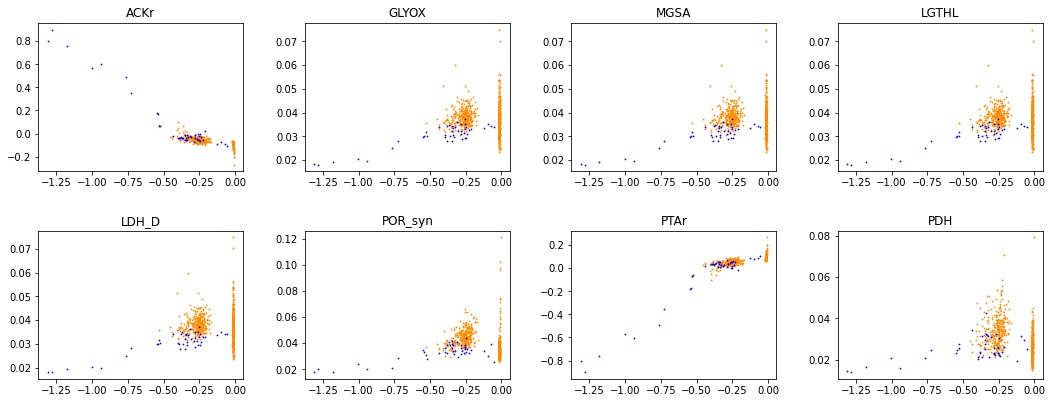

Photosynthesis 5


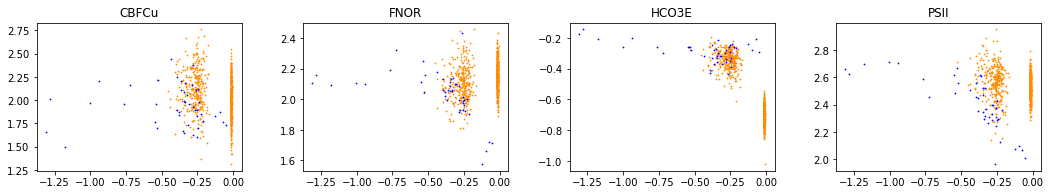

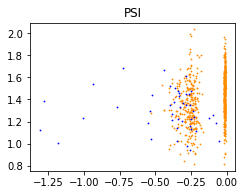

Glycolysis/Gluconeogenesis 8


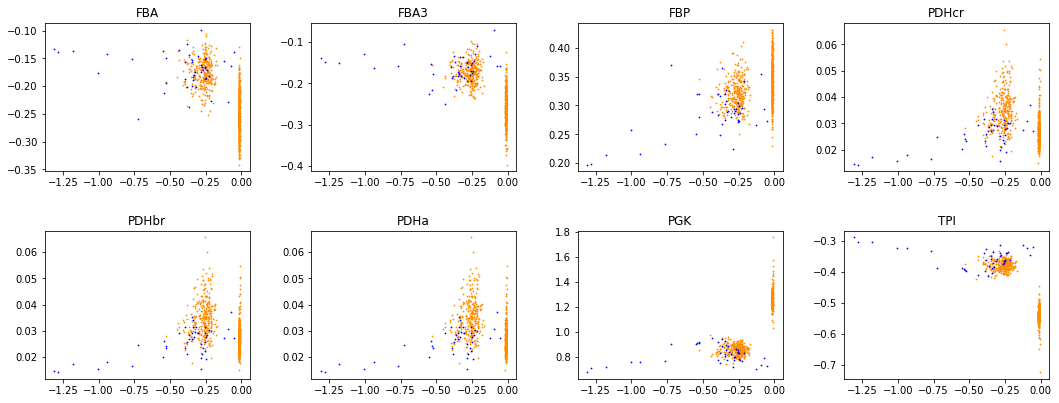

Nitrogen metabolism 3


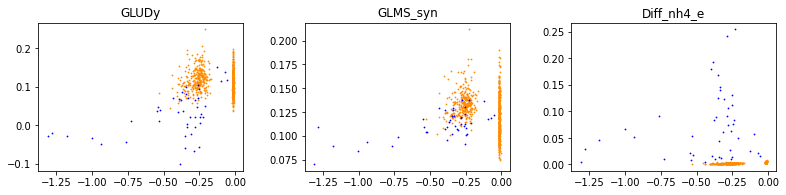

Hydrogen production 1


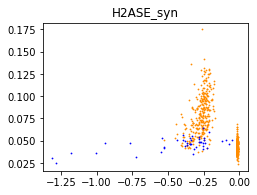

Carbon fixation 4


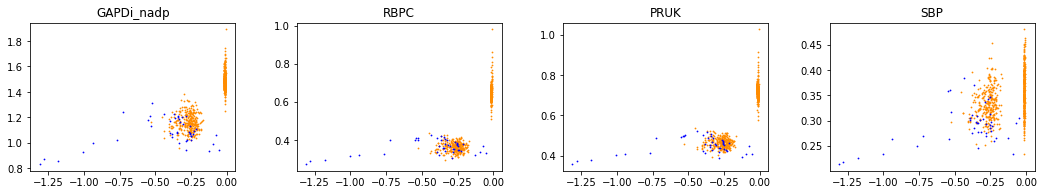

Galactolipids metabolism 3


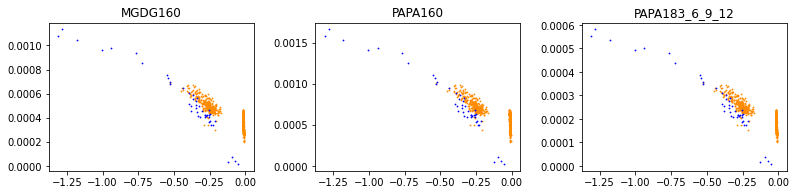

Lipopolysaccharide biosynthesis 4


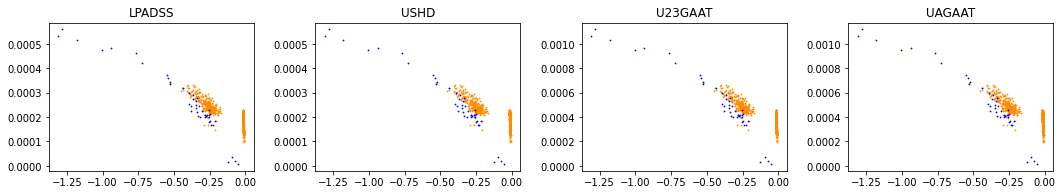

Citrate cycle (TCA cycle) 1


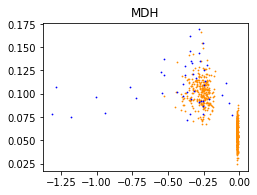

Purine metabolism 2


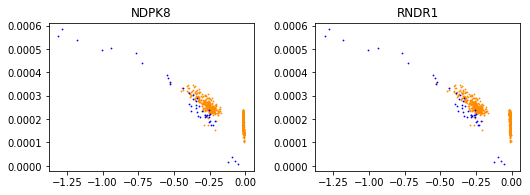

Porphyrin and chlorophyll metabolism 4


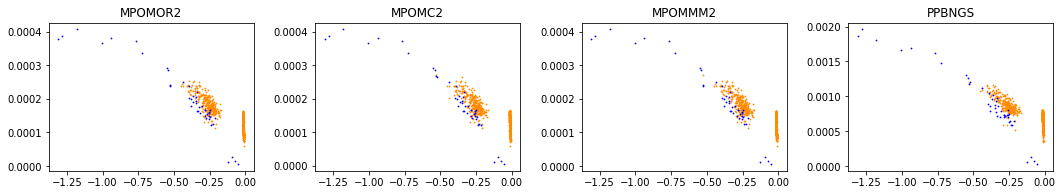

Peptidoglycan biosynthesis 2


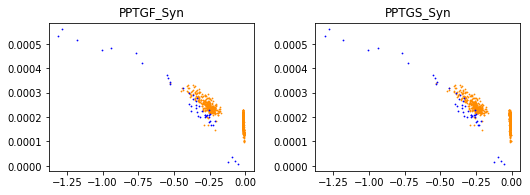

Pentose phosphate pathway 4


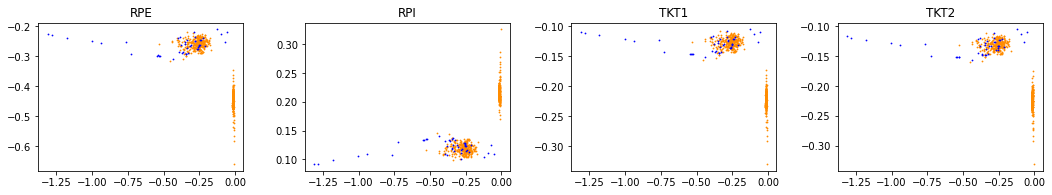

Transport 6


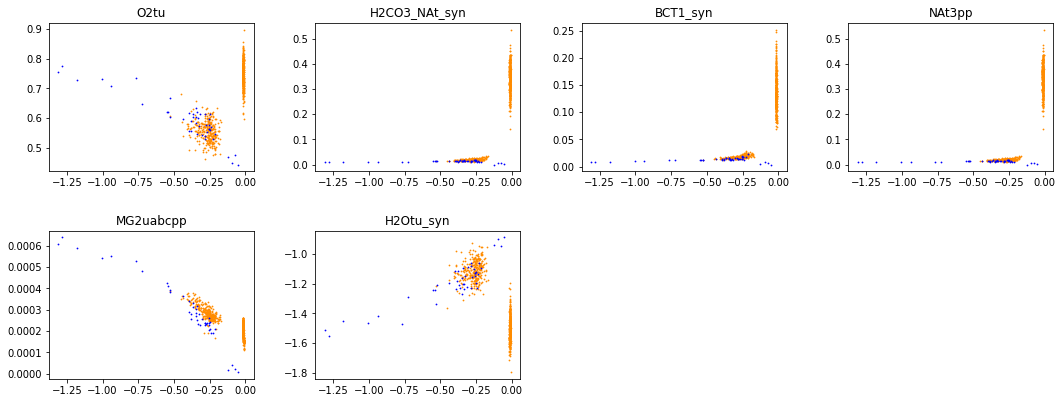

Carotenoid Biosynthesis 1


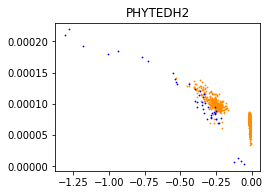

Intracellular source/sink 2


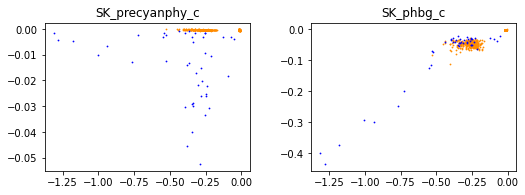

Intracellular demand 2


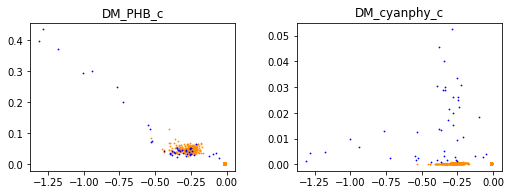

Oxidative phosphorylation 1


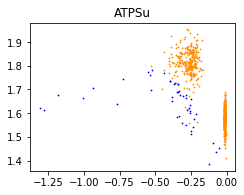

In [31]:
plt.rcParams['figure.figsize'] = [18,18]

subs = {}
for r in stat_results:
    s = model.reactions.get_by_id(r).subsystem
    if s not in subs.keys():
        subs[s] = [r]
    else:
        subs[s].append(r)

for s in subs:
    print(s, len(subs[s]))
    n = 0 
    size = int(max(len(subs[s])/4, round(len(subs[s])/4)))
    if size == 0:
        size = 1
 
    while n<len(subs[s]):
        a = 0
        if a < 10: 
            plt.figure(0)
            plt.title(s)
            plots = []
            for i in range(size):
                for j in range(4):
                    if n<len(subs[s]):
                        ax = plt.subplot2grid((5,4), (i,j), )
                        plt.subplots_adjust(hspace=0.4,wspace=0.3)
                        plt.scatter(final_mean_dfs[1]['BIOMASS_Ec_SynMixo']/final_mean_dfs[1]['EX_hco3_e'], 
                                    final_mean_dfs[1][subs[s][n]], s=0.6, color='darkorange')
                        plt.scatter(final_mean_dfs[0]['BIOMASS_Ec_SynMixo']/final_mean_dfs[0]['EX_hco3_e'], 
                                    final_mean_dfs[0][subs[s][n]], s=0.6, color='blue')
                        plt.title(subs[s][n], y=1, loc='center')
                        #plt.xlabel('Growth rate h⁻¹')
                    #plt.yticks(visible=False)

    
                    a+=1
                    n+=1
            plt.show()